In [ ]:
Environment versions:
Matplotlib 3.7.1
Numpy 1.23.5
Pandas 1.5.3
Python 3.11.3
Seaborn 0.12.2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, pearsonr, spearmanr, ttest_ind, chi2_contingency, linregress
%matplotlib inline

Colours for plots chosen based on:
Choosing Colormaps in Matplotlib — Matplotlib 3.8.1 documentation - colour guide 
https://matplotlib.org/stable/users/explain/colors/colormaps.html.

Using 'viridis' palette/colours throughout as colour blind friendly.

In [3]:
#Read in cleaned census data as Pandas df
df = pd.read_csv('census_11_cleaned_with_salary_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     8370 non-null   int64 
 1   House Number                   8370 non-null   int64 
 2   Street                         8370 non-null   object
 3   First Name                     8370 non-null   object
 4   Surname                        8370 non-null   object
 5   Age (years)                    8370 non-null   int64 
 6   Relationship to Head of House  8370 non-null   object
 7   Marital Status                 6395 non-null   object
 8   Gender                         8370 non-null   object
 9   Occupation                     8370 non-null   object
 10  Infirmity                      8370 non-null   object
 11  Religion                       8108 non-null   object
 12  Age Group                      8370 non-null   object
 13  Occ

In [4]:
#Remove the "Unnamed: 0" column
df = df.drop(columns='Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8370 non-null   int64 
 1   Street                         8370 non-null   object
 2   First Name                     8370 non-null   object
 3   Surname                        8370 non-null   object
 4   Age (years)                    8370 non-null   int64 
 5   Relationship to Head of House  8370 non-null   object
 6   Marital Status                 6395 non-null   object
 7   Gender                         8370 non-null   object
 8   Occupation                     8370 non-null   object
 9   Infirmity                      8370 non-null   object
 10  Religion                       8108 non-null   object
 11  Age Group                      8370 non-null   object
 12  Occupation Category            8370 non-null   object
 13  Hou

**Age of the population**

Analysis undertaken in this section:

1. Summary stats (.describe() plus IQR)
2. Distribution of total population by age
3. Distribution of female population by age
4. Distribution of male population by age
5. Population pyramid (coloured by gender/age band)

In [5]:
#Print Age (years) stats of count, mean, std, min, 25, 50, 75, max using .describe() plus IQR
def summary_stats_column_with_iqr(data, column):
    """
    Generate a summary statistics table for a specified column in a DataFrame.

    Parameters:
    dataframe (pd.DataFrame): Input DataFrame.
    column(str): Name of the series for which statistics are calculated.

    Returns:
    pd.DataFrame: Summary statistics table.
    """
    summary_stats = data[column].describe().round(1)

    #Calculate IQR
    q1 = summary_stats['25%']
    q3 = summary_stats['75%']
    iqr = q3 - q1

    #Add IQR to the .describe() output
    summary_stats['IQR'] = iqr
    
    return summary_stats

age_stats = summary_stats_column_with_iqr(df, 'Age (years)')
age_stats

count    8370.0
mean       36.3
std        21.8
min         0.0
25%        19.0
50%        36.0
75%        51.0
max       116.0
IQR        32.0
Name: Age (years), dtype: float64

Mean age of the population is 36.3 years. The oldest person in the dataset is 116.

Examine the age distribution of the population to infer future growth or shrinkage. Determine if there will be more retired aged people in the future, more school-aged children, more young people, etc.

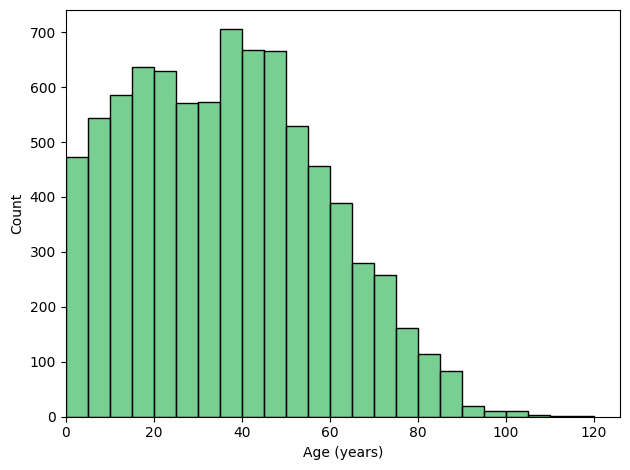

In [6]:
#Define the age bins and ranges
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]
age_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100-104', '105-109', '110-114', '115-119']

#Create a new column in df to store age groups
df['Age Group'] = pd.cut(df['Age (years)'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

#Set a fixed width for the bins
bin_width = age_bins[1] - age_bins[0]

#Create a function for printing histogram of age groups with defined bin_width, bins, series and color
def plot_series_distribution(data, column, bins, bin_width, color_index=0):
    """
    Plot the distribution of a specified series using a histogram.

    Parameters:
    dataframe (pd.DataFrame): Input DataFrame.
    column (str): Column name for the x-axis.
    bins (int or sequence): Specification for the number of bins or bin edges.
    bin_width (float): Width of each bin.
    color_index (int, optional): Index of the colour to use from the Viridis colormap. Default is 0.

    Returns:
    fig (matplotlib.figure.Figure): The generated matplotlib figure.
    """
    
    #Create a histogram using sns with a specific color from the Viridis colormap
    fig, ax = plt.subplots()
    sns.histplot(data, x=column, bins=bins, binwidth=bin_width, color=sns.color_palette('viridis')[color_index], ax=ax)

    #Set the x-axis limits to start from 0 without any gap
    ax.set_xlim(left=0)
    
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.tight_layout()
    
    return fig

age_count = plot_series_distribution(df, 'Age (years)', bins=age_bins, bin_width=bin_width, color_index=4)

*Total population trends*

Of the total population, there is the largest number of people in the 40-54 age range. 

There is also a large population of 15-24 year olds, in all likelihood due to the large number of students in the town.

There are fewer 0-4 year olds compared to school-age children.

From age 50 onwards there is a decreasing trend in number of people as age increases, in all likelihood due to increased deaths.

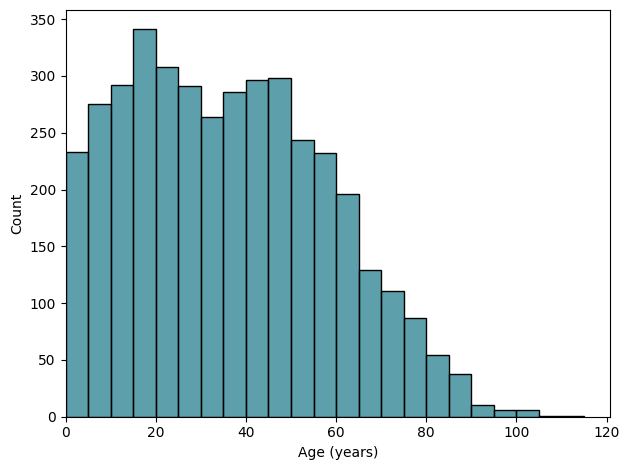

In [7]:
#Histogram of Male ages
#Pull out only male records
male_df = df[(df['Gender'] == 'Male')]

male_age = plot_series_distribution(male_df, 'Age (years)', bins=age_bins, bin_width=bin_width, color_index=2)

*Male population trends*

For males, the largest number are aged 15-19. Population of males is also higher in early 20s, again likely due to student population.

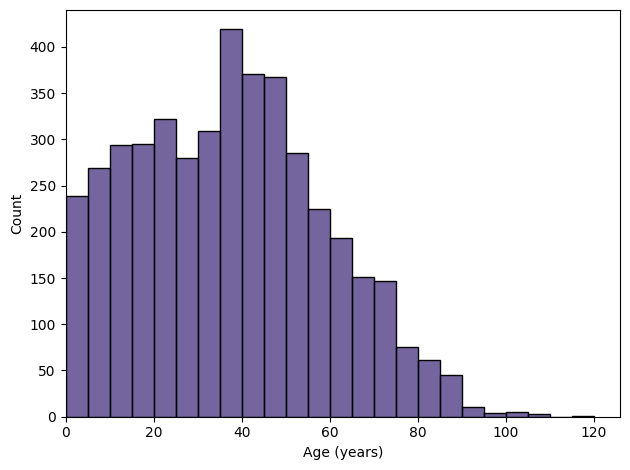

In [8]:
#Histogram of Female ages
#Pull out only female records
female_df = df[(df['Gender'] == 'Female')]

female_age = plot_series_distribution(female_df, 'Age (years)', bins=age_bins, bin_width=bin_width, color_index=0)

*Female population trends*

In contrast to males, count of females is highest later in life aged 35-39, followed by 40-49. Again, early 20s indicates higher population in all likelihood due to students.

*Age pyramid*

#Function for creating age pyramid

#Plot is by colour on age group

def plot_age_pyramid(male_df, female_df):

    """
    Create an age pyramid plot based on male and female population data.

    Parameters:
    male_df (pd.DataFrame): DataFrame containing male population data, including 'Age Group' and 'Age (years)' columns.
    female_df (pd.DataFrame): DataFrame containing female population data, including 'Age Group' and 'Age (years)' columns.

    Returns:
    fig (matplotlib.figure.Figure): The generated matplotlib figure.
    """
    #Create dfs for male and female Age Group and Age
    age_agegroup_m = male_df[['Age Group', 'Age (years)']]
    age_agegroup_f = female_df[['Age Group', 'Age (years)']]

    #Count people in each age group for males and females
    count_by_agegroup_m = age_agegroup_m.groupby('Age Group')['Age (years)'].count().reset_index()
    count_by_agegroup_f = age_agegroup_f.groupby('Age Group')['Age (years)'].count().reset_index()

    #Rename columns
    count_by_agegroup_m.columns = ['Age Group', 'Count of Males']
    count_by_agegroup_f.columns = ['Age Group', 'Count of Females']

    #Create df with negative male counts for pyramid plotting
    count_by_agegroup_m_minus1 = count_by_agegroup_m.copy()
    count_by_agegroup_m_minus1['Count of Males'] *= -1

    #Merge dfs on Age Group
    count_by_agegroup = pd.merge(count_by_agegroup_m_minus1, count_by_agegroup_f, on='Age Group')

    #Define a custom color palette for each age group
    age_group_palette = sns.color_palette("viridis", n_colors=len(count_by_agegroup['Age Group']))

    #Plot the age pyramid with each age group having a different color
    fig, ax = plt.subplots(figsize=(8, 6))
    for i, age_group in enumerate(count_by_agegroup['Age Group']):
        sns.barplot(x='Count of Males', y='Age Group', data=count_by_agegroup[count_by_agegroup['Age Group'] == age_group],
                    palette=[age_group_palette[i]], order=count_by_agegroup['Age Group'][::-1], ax=ax)
        sns.barplot(x='Count of Females', y='Age Group', data=count_by_agegroup[count_by_agegroup['Age Group'] == age_group],
                    palette=[age_group_palette[i]], order=count_by_agegroup['Age Group'][::-1], ax=ax)

    plt.xlabel('Population Count')
    plt.ylabel('Age Group (years)')
    plt.tight_layout()

    return fig
    
pyramid_age_group = plot_age_pyramid(male_df, female_df)

#Females on right, males on left (negative)

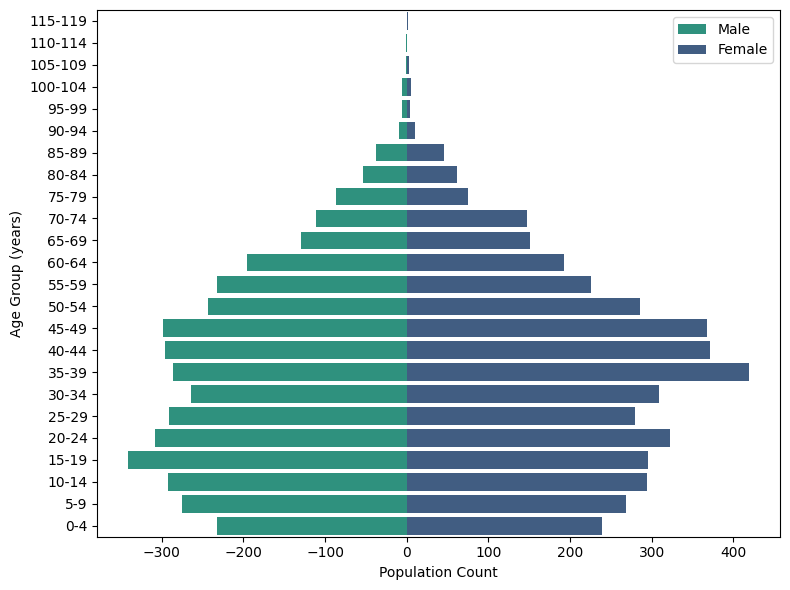

In [9]:
#Function for plot coloured by gender
def plot_age_pyramid_gender(male_df, female_df):
    """
    Plot an age pyramid colored by gender.

    Parameters:
    male_df (pd.DataFrame): DataFrame containing male population data, including 'Age Group' and 'Age (years)' columns.
    female_df (pd.DataFrame): DataFrame containing female population data, including 'Age Group' and 'Age (years)' columns.

    Returns:
    fig (matplotlib.figure.Figure): The generated matplotlib figure.
    """
    #Create dfs for male and female Age Group and Age
    age_agegroup_m = male_df[['Age Group', 'Age (years)']]
    age_agegroup_f = female_df[['Age Group', 'Age (years)']]

    #Count people in each age group for males and females
    count_by_agegroup_m = age_agegroup_m.groupby('Age Group')['Age (years)'].count().reset_index()
    count_by_agegroup_f = age_agegroup_f.groupby('Age Group')['Age (years)'].count().reset_index()

    #Rename columns
    count_by_agegroup_m.columns = ['Age Group', 'Count of Males']
    count_by_agegroup_f.columns = ['Age Group', 'Count of Females']

    #Create df with negative male counts for pyramid plotting
    count_by_agegroup_m_minus1 = count_by_agegroup_m.copy()
    count_by_agegroup_m_minus1['Count of Males'] *= -1

    #Merge dfs on Age Group
    count_by_agegroup = pd.merge(count_by_agegroup_m_minus1, count_by_agegroup_f, on='Age Group')
    
    #Plot the age pyramid
    fig, ax = plt.subplots(figsize=(8, 6))
    age_pyramid = sns.barplot(x='Count of Males', y='Age Group', data=count_by_agegroup,
                              order=count_by_agegroup['Age Group'][::-1], color=sns.color_palette('viridis')[3], label='Male', ax=ax)
    sns.barplot(x='Count of Females', y='Age Group', data=count_by_agegroup,
                order=count_by_agegroup['Age Group'][::-1], color=sns.color_palette('viridis')[1], label='Female', ax=ax)

    plt.xlabel('Population Count')
    plt.ylabel('Age Group (years)')
    plt.legend()
    plt.tight_layout()
    
    return fig

pyramid_male_female = plot_age_pyramid_gender(male_df, female_df)

*Summary of age population analysis*

Mean age of the population is 36.3 years. The oldest person in the dataset is 116.

Examining the population pyramid, there is a slightly lower number of 0-4 year olds in comparison to school age children.

There is a higher proportion of people aged 15-19 and 20-24 which correlates with the student population of the town.

There is also a higher proportion of 35-49 year olds, particularly women, suggesting there might be more retired people in the next 20 years.

The population also tends to live well into old age, for both male and female. There are fewer people aged 65 and over compared to the rest of the population (in all likelihood due to increased deaths with increased age).

Overall, this analysis indicates a generally aging population, with a lower number of 0-4 year olds compared to school-aged children. Aside from the increased population in early 20s likely due to student population, the largest numbers of people are middle-aged, suggesting a potential requirement to provide care and facilities in the future for an aging population.

**Commuters**

Analysis undertaken in this section:

1. Identify commuters (aside from university students) in employed population
2. Percentage of commuters (including university students) of total population
3. Percentage of commuters (excluding university students) of employed population

Consider occupations more likely to commute.

Occupations such as teaching (except higher education), food and shop workers, firefighters, public, youth, local or community roles will be considered non-commuting occupations for the purpose of this analysis. 

Using this reasoning/assumption, calculate percentage of the population that are commuters and the percentage of the working population (not students) that commute.

In [10]:
#Filter for Employed and Students (16 and over) in df
employed_student = df[df['Occupation Category'].isin(['Employed', 'Student'])]

#Exclude specific occupations from commuters
#Makes assumption that these occupations are more likely to be local
#OK to include teacher here because higher education entries are lecturers or admin staff (not named teacher)
#Used a lambda function
exclude_occupations = ['teacher', 'barista', 'retail', 'restaurant', 'community', 'public', 'youth ', 'local', 'firefighter']
commuters_student = employed_student[~employed_student['Occupation'].str.lower().str.strip().apply(lambda x: any(word in x.lower() for word in exclude_occupations))]

#Exclude entries with the exact word "student" but keep variations like "university student" or "PhD student"
#This ensures any students (at college or sixth form, aged 16-18 are excluded)
commuters = commuters_student[~commuters_student['Occupation'].str.lower().str.strip().eq('student')]

In [11]:
#Print percentage of commuters of total population
#Number of commuters
total_commuters = len(commuters)
print(f"Number of commuters: {total_commuters}")

#Count of total population
total_population = len(df)

#Calculate the percentage of commuters of total population
percentage_commuters = (total_commuters/total_population) * 100

print(f"Percentage of commuters: {percentage_commuters:.1f}%")

Number of commuters: 4734
Percentage of commuters: 56.6%


In [12]:
#Remove university students to get just employed commuters and calculate percentage
commuters_nostudents = commuters[~commuters['Occupation'].str.contains('student', case=False)]

#Print percentage of commuters (excluding university students) of working population
employed = df[df['Occupation Category'] == 'Employed']
total_employed = len(employed)
print(f"Number of employed: {total_employed}")
total_commuters_nostudents = len(commuters_nostudents)
print(f"Number of commuters (excluding university students): {total_commuters_nostudents}")

#Calculate the percentage of commuters (excluding university students)
percentage_commuters_nostudents = (total_commuters_nostudents/total_employed) * 100

print(f"Percentage of commuters (excluding univerity students): {percentage_commuters_nostudents:.1f}%")

Number of employed: 4497
Number of commuters (excluding university students): 4193
Percentage of commuters (excluding univerity students): 93.2%


This seems very high percentage of commuters of working population but after visual inspection of the occupations, there is no indication that other occupations are not required to commute (so would be incorrect assumption to exclude).

*Summary of commuter analysis*

57% of the total population are commuters. Of those employed and not university students, 93% of the working population are estimated to commute. This very high number of commuters provides a case for providing more transport links to the neighbouring cities (like a train service).

**Salary**

Analysis undertaken in this section:

1. Summary stats (.describe() plus IQR)
2. Distribution of salary in employed population
3. Distribution of employed population earning <= to and >£50000 by age
4. Hypothesis testing to determine if significant difference between
    - salary vs gender
    - salary vs age
    - salary vs marital status and gender

The main caveats of using ONS data to infer salary is the accuracy of the fuzzy match (see data cleaning) and the salary data (median salary provided) does not account for full- and part-time working.

Salary data (median salary by Standard Occupational Classification occupation) for matching was provided here:

Office for National Statistics (2023) Earnings and hours worked, occupation by four-digit SOC: ASHE Table 14. Available online: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/occupation4digitsoc2010ashetable14 [Accessed 26/11/2023]

Fuzzy matching reference:

Pypi (2020) fuzzywuzzy 0.18.0. Available online: https://pypi.org/project/fuzzywuzzy/ [Accessed 26/11/2023]

Those who are students, children, unemployed, retired or occupation is Unknown (see data cleaning) were assigned a salary of £0.

In [13]:
#Filter df for Employed and exclude any Occupation where it is Unknown (refer to data cleaning)
employed_salary = df[(df['Occupation Category'] == 'Employed') & (df['Occupation'].str.strip != 'Unknown')]
#display(employed_salary)

In [14]:
salary_stats = summary_stats_column_with_iqr(employed_salary, 'Salary (GBP)')
salary_stats

count     4497.0
mean     34952.3
std      10270.2
min          0.0
25%      27734.0
50%      34909.0
75%      40066.0
max      78599.0
IQR      12332.0
Name: Salary (GBP), dtype: float64

Mean Salary for the town is £35115.2 (mean of median salaries assigned by ONS fuzzy matching)

*Distribution of salary in employed population*

In [15]:
#Create copy of employed_salary to work with
employed_salary_copy = employed_salary.copy()

#Create a new column Salary Category with non-overlapping ranges
employed_salary_copy['Salary Category'] = pd.cut(
    employed_salary_copy['Salary (GBP)'],
    bins=[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 120000],
    labels=[
        'Under 10000 (GBP)', '10000 to <20000 (GBP)', '20000 to <30000 (GBP)',
        '30000 to <40000 (GBP)', '40000 to <50000 (GBP)', '50000 to <60000 (GBP)',
        '60000 to <70000 (GBP)', 'Over 70000 (GBP)'
    ]
)

#Calculate the percentage of each salary category
salary_category_percentages = (employed_salary_copy['Salary Category'].value_counts(normalize=True) * 100).sort_index()

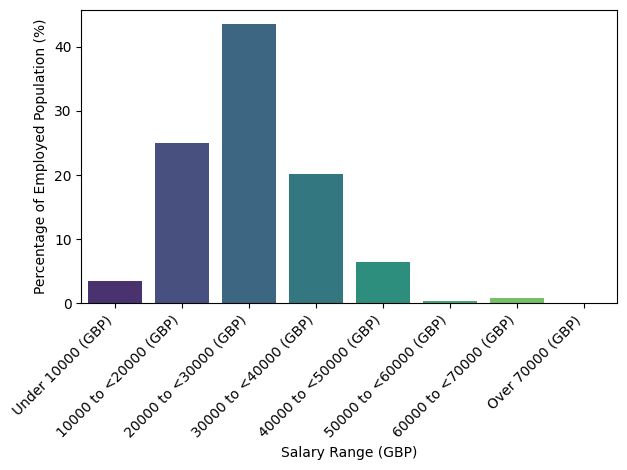

In [16]:
#Plot distribution of occupation categories
def plot_salary_distribution(x_data, y_data):
    """
    Plot the distribution of a categorical variable.

    Parameters:
    x_data (str): Name of the column in 'data' to be plotted on the x-axis.
    x_label (str): Label for the x-axis.
    
    Returns:
    fig (matplotlib.figure.Figure): The generated matplotlib figure.
    """
    
    fig, ax = plt.subplots()
    sns.barplot(x=x_data, y=y_data, palette='viridis')

    plt.xlabel('Salary Range (GBP)')
    plt.ylabel('Percentage of Employed Population (%)')
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout()

    plt.show()
    
    return fig

salary_distribution = plot_salary_distribution(salary_category_percentages.index, salary_category_percentages.values)

The majority of the working population earn between £10000 and up to £40000. 

Over 40% of employed earn between £20000, up to £30000. 

National median annual earnings for full-time employees was £34,963 for the tax year ending on 5 April 2023:

Office for National Statistics (2023) Employee earnings in the UK: 2023. Available online: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2023 [Accessed 08/12/2023]

The town appears to be reasonably affluent (can't decipher if full- or part-time working).

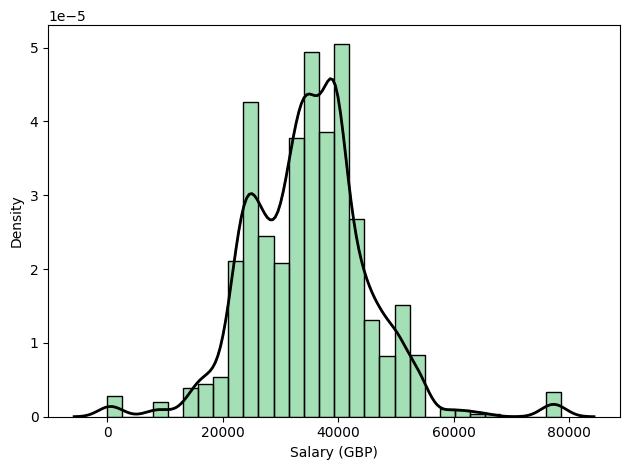

In [17]:
#Confirm normal distribution of salary data by plotting
sns.histplot(employed_salary['Salary (GBP)'], kde=True, color=sns.color_palette('viridis')[4], bins=30, stat='density')

#Use sns.kdeplot to plot the KDE curve
sns.kdeplot(employed_salary['Salary (GBP)'], color='black', linewidth=2)

plt.xlabel('Salary (GBP)')
plt.ylabel('Density')
plt.tight_layout()

plt.show()

In a density plot, the y-axis represents the density of the distribution. The density is a measure of how the probability mass is spread across the variable on the x-axis. The higher the density at a given point, the more likely the data points are concentrated around that value.

X-axis: Represents the variable measured (in this case, Salary).

Y-axis: Represents the density, which is a measure of how many data points fall within a small interval along the x-axis.
In a density plot, the area under the curve is  normalised to ensure that the total area equals 1. This normalisation allows interpretation of the height of the curve as a probability density.

Salary displays a normal distribution.

In [18]:
#Want to see spread of data and median age for those earning above or equal to and below £50000
#Create a new column 'Salary Category'
#Individuals with a salary of exactly 50000 will be categorised as '50000 and under (GBP)' because the left endpoint of the bin is inclusive, and the right endpoint is exclusive
employed_salary_copy['Salary Category'] = pd.cut(employed_salary_copy['Salary (GBP)'], bins=[-float('inf'), 50000, float('inf')], labels=['<=50000 (GBP)', '>50000 (GBP)'])

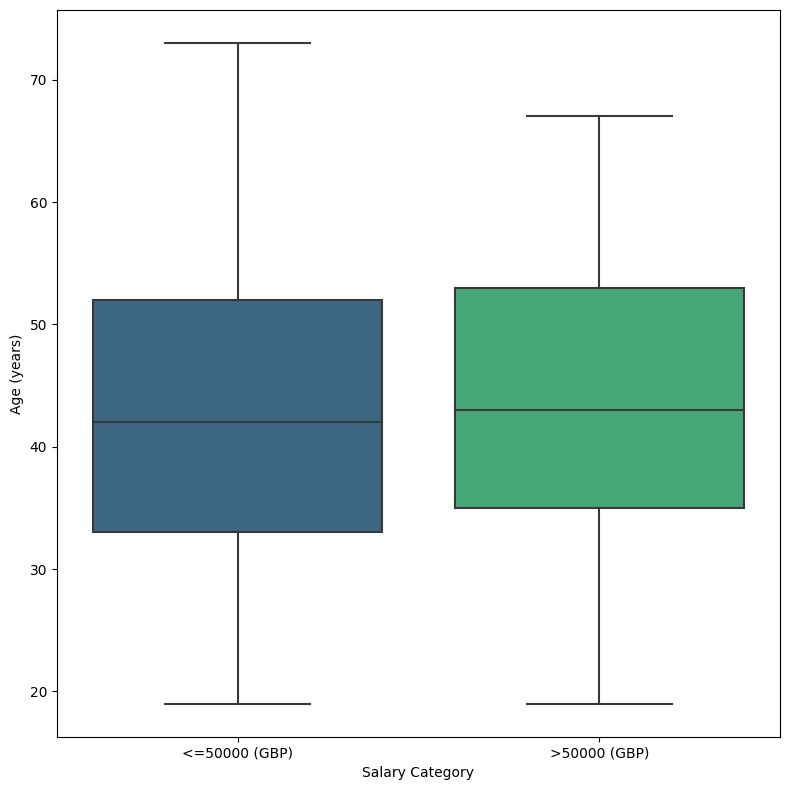

In [19]:
#Define function for creating boxplot
def plot_boxplot(data, x_column, y_column):
    """
    Plot a boxplot of one numerical variable against a categorical variable using seaborn.

    Parameters:
    data (pd.DataFrame): Input DataFrame.
    x_column (str): Name of the categorical variable to be plotted on the x-axis.
    y_column (str): Name of the numerical variable to be plotted on the y-axis.

    Returns:
    fig (matplotlib.figure.Figure): The generated matplotlib figure.
    """
    
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.boxplot(data=data, x=x_column, y=y_column, palette='viridis', ax=ax)
    plt.xlabel(x_column)
    plt.ylabel(y_column) 
    plt.tight_layout()
    
    return fig


salary_category_vs_age = plot_boxplot(employed_salary_copy, 'Salary Category', 'Age (years)')

In [20]:
#Group by Salary Category and Age
salary_age = employed_salary_copy.groupby('Salary Category')['Age (years)']

#Create a function for describe plus IQR for grouped dataframes
def describe_with_iqr_grouped_df(grouped_df):
    """
    Perform .describe() with added IQR on a grouped_df for a DataFrame.

    Parameters:
    grouped_df: pandas.DataFrame, the grouped DataFrame

    Returns:
    pandas.DataFrame, the resulting DataFrame with statistics and IQR
    """
    #Calculate .describe() on the specified df and round to 1dp
    summary_stats = grouped_df.describe().round(1)

    #Rename the columns for clarity
    summary_stats.columns = ['Count', 'Mean', 'Std', 'Min', '25% (Q1)', '50% (Median)', '75% (Q3)', 'Max']

    #Calculate IQR
    q1 = summary_stats['25% (Q1)']
    q3 = summary_stats['75% (Q3)']
    iqr = q3 - q1

    #Add IQR to the .describe() output
    summary_stats['IQR'] = iqr
    
    #Sort by descending count
    summary_stats = summary_stats.sort_values(by='Count', ascending=False)

    return summary_stats

salary_age_stats = describe_with_iqr_grouped_df(salary_age)
salary_age_stats

,Count,Mean,Std,Min,25% (Q1),50% (Median),75% (Q3),Max,IQR
Salary Category,,,,,,,,,
<=50000 (GBP),4148.0,42.7,12.1,19.0,33.0,42.0,52.0,73.0,19.0
>50000 (GBP),349.0,43.4,12.0,19.0,35.0,43.0,53.0,67.0,18.0


In [21]:
#Calculate count of <=50000 (GBP) and >50000 (GBP)
salary_category_counts = employed_salary_copy['Salary Category'].value_counts()

#Calculate percentage
percentage_over_50000 = (salary_category_counts['<=50000 (GBP)'] / salary_category_counts.sum()) * 100
percentage_under_50000 = (salary_category_counts['>50000 (GBP)'] / salary_category_counts.sum()) * 100

print(f"Percentage Over 50000 (GBP): {percentage_over_50000:.1f}%")
print(f"Percentage Under 50000 (GBP): {percentage_under_50000:.1f}%")

Percentage Over 50000 (GBP): 92.2%
Percentage Under 50000 (GBP): 7.8%


There is very little difference in Median age for those earning £50000 or lower, compared to over £50000. However, the proportion of the working population earning over £50000 is significantly less (7.8%) than those earning £50000 or lower.

*Salary by Marital Status and Gender*

*Salary vs Gender*

Null Hypothesis (H0): There is no significant difference in salaries between males and females.
    
Alternative Hypothesis (H1): There is a significant difference in salaries between males and females.

Newcastle University (n. d.) Introduction to hypothesis testing (psychology). Available online: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/psychology/introduction-to-hypothesis-testing.html [Accessed 26/11/2023]

Using t-test.

Statistics How To (2023) T test (student’s t-test): definition and examples. Available online: https://www.statisticshowto.com/probability-and-statistics/t-test/ [Accessed 26/11/2023]

Independent samples t-test (or two-sample t-test) used when comparing the means of two independent groups to determine if they are significantly different from each other.

The t-test produces a t-statistic and a p-value. The t-statistic is a measure of how far the sample mean is from the null hypothesis mean in terms of standard error. The p-value indicates the probability of observing such a difference  if the null hypothesis is true. If the p-value is below a the significance level (commonly 0.05), the null hypothesis is rejected and there is a significant difference between the groups.

p value is 0.05.

In [22]:
#Extract male and female salaries from employed population
male_salaries = employed_salary_copy[employed_salary_copy['Gender'] == 'Male']['Salary (GBP)']
female_salaries = employed_salary_copy[employed_salary_copy['Gender'] == 'Female']['Salary (GBP)']

def perform_t_test(data1, data2, alpha=0.05):
    """
    Perform a t-test on two sets of data.

    Parameters:
    data1, data2: pandas Series or numpy arrays, the two sets of data to compare
    alpha: float, the significance level (default is 0.05)

    Returns:
    tuple, (t-statistic, p-value)
    """
    #Perform t-test
    t_stat, p_value = ttest_ind(data1, data2)

    print(f"T-statistic: {t_stat:.3f}")
    print(f"P-value: {p_value:.3f}")

    #Check if the p-value is less than the significance level
    if p_value < alpha:
        print("Null hypothesis rejected: There is a statistically significant difference between the two groups.")
    else:
        print("Null hypothesis not rejected: There is no statistically significant difference between the two groups.")

    return

perform_t_test(male_salaries, female_salaries)

T-statistic: 1.204
P-value: 0.229
Null hypothesis not rejected: There is no statistically significant difference between the two groups.


*Salary by Age*

Null hypothesis (H0): No correlation (linear or monotonic) between salary and age

Alternative Hypothesis (H1): There is a significant correlation between salary and age.

p value is 0.05.

Using Pearson (linear) and Spearman rank (non-linear) correlation coefficients.

Pearson rank

Reference Pearson rank: 
SciPy (n. d.) Scipy.stats.pearsonr. Available online: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html [Accessed 08/12/2023]

Measures the linear relationship between two continuous variables (assuming normal distribution and linearity). Result ranges from -1 to 1. 1 indicates a perfect positive linear correlation, -1 indicates a perfect negative linear correlation, and
0 indicates no linear correlation.

Spearman rank

Reference Spearman rank: 
SciPy (n. d.) Scipy.stats.spearmanr. Available online: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html [Accessed 08/12/2023]

Measures the monotonic relationship between two variables, where one variable increases, the other variable consistently increases or decreases, but not necessarily at a constant rate (does not assume linearity). In other words, there is a consistent trend or pattern in the relationship. Result ranges from -1 to 1. 1 indicates a perfect positive linear correlation, -1 indicates a perfect negative linear correlation, and 0 indicates no linear correlation.

Newcastle University (n. d.) Strength of correlation. Available online: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/strength-of-correlation.html [Accessed 26/11/2023]

In [23]:
#Define function run Pearson and Spearman rank tests
def correlation_tests(variable1, variable2):
    """
    Calculate Pearson and Spearman correlations between two variables and perform hypothesis testing.

    Parameters:
    variable1 (array): First variable for correlation analysis.
    variable2 (array): Second variable for correlation analysis.

    Returns:
    None
    """
    #Calculate Pearson correlation coefficient and p-value
    pearson_coefficient, pearson_p_value = pearsonr(variable1, variable2)

    #Calculate Spearman rank correlation coefficient and p-value
    spearman_coefficient, spearman_p_value = spearmanr(variable1, variable2)

    print(f"Pearson correlation coefficient: {pearson_coefficient:.3f}")
    print(f"P-value (Pearson): {pearson_p_value:.3f}")

    print(f"Spearman rank correlation coefficient: {spearman_coefficient:.3f}")
    print(f"P-value (Spearman): {spearman_p_value:.3f}")

    #Check if null hypothesis stands (p-value > 0.05)
    if pearson_p_value > 0.05 and spearman_p_value > 0.05:
        print("Null hypothesis stands: No significant correlation.")
    else:
        print("Null hypothesis rejected: Significant correlation exists.")

correlation_tests(employed_salary_copy['Salary (GBP)'], employed_salary_copy['Age (years)'])

Pearson correlation coefficient: 0.011
P-value (Pearson): 0.481
Spearman rank correlation coefficient: 0.007
P-value (Spearman): 0.616
Null hypothesis stands: No significant correlation.


*Salary vs Marital Status/by Gender*

Null Hypothesis (H0): There is no significant difference in salaries between divorced and married.
    
Alternative Hypothesis (H1): There is a significant difference in salaries between divorced and married.

Using t-test.

p value is 0.05.

In [24]:
#Extract divorced and married salaries from employed population
married_salaries = employed_salary_copy[employed_salary_copy['Marital Status'] == 'Married']['Salary (GBP)']
divorced_salaries = employed_salary_copy[employed_salary_copy['Marital Status'] == 'Divorced']['Salary (GBP)']

perform_t_test(married_salaries, divorced_salaries)

T-statistic: 1.287
P-value: 0.198
Null hypothesis not rejected: There is no statistically significant difference between the two groups.


Null Hypothesis (H0): There is no significant difference in salaries between divorced and married males.
    
Alternative Hypothesis (H1): There is a significant difference in salaries between divorced and married males.

p value is 0.05.

In [25]:
#Extract male salaries for married and divorced from employed population
male_married_salaries = employed_salary_copy[(employed_salary_copy['Gender'] == 'Male') & (employed_salary_copy['Marital Status'] == 'Married')]['Salary (GBP)']
male_divorced_salaries = employed_salary_copy[(employed_salary_copy['Gender'] == 'Male') & (employed_salary_copy['Marital Status'] == 'Divorced')]['Salary (GBP)']

perform_t_test(male_married_salaries, male_divorced_salaries)

T-statistic: -0.732
P-value: 0.464
Null hypothesis not rejected: There is no statistically significant difference between the two groups.


Null Hypothesis (H0): There is no significant difference in salaries between divorced and married females.
    
Alternative Hypothesis (H1): There is a significant difference in salaries between divorced and married females.

p value is 0.05.

In [26]:
#Extract female salaries for married and divorced from employed population
female_married_salaries = employed_salary_copy[(employed_salary_copy['Gender'] == 'Female') & (employed_salary_copy['Marital Status'] == 'Married')]['Salary (GBP)']
female_divorced_salaries = employed_salary_copy[(employed_salary_copy['Gender'] == 'Female') & (employed_salary_copy['Marital Status'] == 'Divorced')]['Salary (GBP)']

perform_t_test(female_married_salaries, female_divorced_salaries)

T-statistic: 2.443
P-value: 0.015
Null hypothesis rejected: There is a statistically significant difference between the two groups.


Null Hypothesis (H0): There is no significant difference in salaries between divorced males and females.
    
Alternative Hypothesis (H1): There is a significant difference in salaries between divorced males and females.

p value is 0.05.

In [27]:
#Perform t test of male divorced saries and female divorced salaries
perform_t_test(male_divorced_salaries, female_divorced_salaries)

T-statistic: 2.078
P-value: 0.038
Null hypothesis rejected: There is a statistically significant difference between the two groups.


Null Hypothesis (H0): There is no significant difference in salaries between married males and females.
    
Alternative Hypothesis (H1): There is a significant difference in salaries between married males and females.

p value is 0.05.

In [28]:
#Perform t test of male married saries and female married salaries
perform_t_test(male_married_salaries, female_married_salaries)

T-statistic: -0.542
P-value: 0.588
Null hypothesis not rejected: There is no statistically significant difference between the two groups.


*Summary of salary*

The majority of the employed population earn between £10000 up to £40000.

Over 40% of employed earn between £20000, up to £30000.

The proportion of the employed population earning over £50000 is significantly less (7.8%) than those earning £50000 or lower.

The town appears to be reasonably affluent. Median salary is slightly higher than the national median salary.

Hypothesis testing showed no significant correlation between salary and age, and no significant difference for salary by gender or marital status (difference in salary between divorced and married/ for males and females). 

Failing to reject the null hypothesis does not prove the null hypothesis; it simply means that there isn't enough evidence to reject it based on the observed data.

**Unemployment** 

Analysis undertaken in this section:

1. Distribution of occupation category
2. Summary stats of occupation by age
2. Unemployment rate (of total and eligible (employed and unemployed) population)
3. Distribution of unemployment by:
    - age
    - gender
4. Hypothesis testing to determine if significant difference between
    - unemployed occupation category vs gender

*Distribution of occupation category*

Plot distribution of occupation category to obtain an overall view of number of employed compared to distribution of other occupation categories for the population.

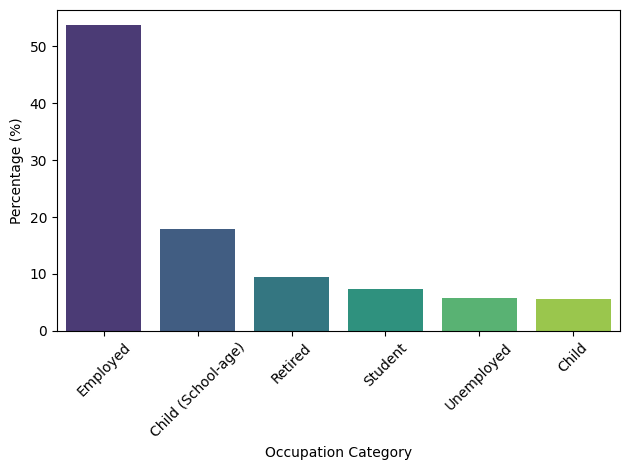

In [30]:
#Plot distribution of occupation categories
def plot_category_distribution(data, x_data):
    """
    Plot the distribution of a categorical variable.

    Parameters:
    data (pd.DataFrame): Input DataFrame.
    x_data (str): Name of the column in 'data' to be plotted on the x-axis.
    
    Returns:
    fig (matplotlib.figure.Figure): The generated matplotlib figure.
    """
    #Order categories by descending count
    order = data[x_data].value_counts().index
    
    #Calculate percentage distribution
    percentage_data = data[x_data].value_counts(normalize=True) * 100
    
    #Create a countplot with x_data on the x-axis
    fig, ax = plt.subplots()
    sns.barplot(x=percentage_data.index, y=percentage_data.values, palette='viridis', order=order, ax=ax)

    plt.xlabel(x_data)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()
    
    return fig

occupation_category_distribution = plot_category_distribution(df, 'Occupation Category')

*Summary stats of Occupation Category by Age*

In [31]:
#Group by Occupation Category and Age
occupationcat_age = df.groupby('Occupation Category')['Age (years)']

occupationcat_age_stats = describe_with_iqr_grouped_df(occupationcat_age)
occupationcat_age_stats

,Count,Mean,Std,Min,25% (Q1),50% (Median),75% (Q3),Max,IQR
Occupation Category,,,,,,,,,
Employed,4497.0,42.8,12.1,19.0,33.0,42.0,52.0,73.0,19.0
Child (School-age),1504.0,11.1,3.7,5.0,8.0,11.0,14.0,17.0,6.0
Retired,790.0,76.9,7.9,66.0,71.0,75.0,81.0,116.0,10.0
Student,620.0,20.2,1.8,18.0,19.0,20.0,21.0,36.0,2.0
Unemployed,487.0,42.5,11.2,19.0,34.0,42.0,50.0,65.0,16.0
Child,472.0,2.1,1.4,0.0,1.0,2.0,3.0,4.0,2.0


The mean age for unemployment is 42.5. The standard deviation is high suggesting variablility in the range of the data.

Determine percentage unemployment of total population/eligible to work (employed and unemployed) population and male vs female unemployment.

In [32]:
#Filter data for Unemployed
unemployed_df = df[df['Occupation Category'] == 'Unemployed']

#Filter data for those eligble to work (Employed and Unemployed)
eligible_to_work = df[(df['Occupation Category'] == 'Employed') | (df['Occupation Category'] == 'Unemployed')]
eligible_population = len(eligible_to_work)

#Calculate unemployment rates
unemployed_rate_total = len(unemployed_df) / total_population * 100
unemployed_rate_eligible = len(unemployed_df) / eligible_population * 100

print(f"The unemployment rate as a percentage of the total population is: {unemployed_rate_total:.1f}%")
print(f"The unemployment rate as a percentage of the eligible population is: {unemployed_rate_eligible:.1f}%")

The unemployment rate as a percentage of the total population is: 5.8%
The unemployment rate as a percentage of the eligible population is: 9.8%


The unemployment rate for the total population is 5.8% which is higher than the national average (England and Wales) in 2023.

The unemployment rate for those eligible to work is 9.8%.

This may be due to many jobs located outside of town. Or could be due to a skills gap in the population. There is no significant difference between male and female salaries (see above in salary calculations). 

The unemployment rate ((England and Wales) was estimated at 4.3% in 2023:

Office for National Statistics (2023) Employment in the UK: 2023. Available online: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/bulletins/employmentintheuk/september2023 [Accessed 08/12/2023]

In [33]:
#What percentage of count of unemployed are male and female
unemployed_gender_counts = unemployed_df['Gender'].value_counts()

#Calculate the percentage rounded to 1dp
unemployed_gender_percentage = round((unemployed_gender_counts / unemployed_gender_counts.sum()) * 100, 1)

print("Percentage of Unemployed by Gender:")
print(unemployed_gender_percentage)

Percentage of Unemployed by Gender:
Female    64.9
Male      35.1
Name: Gender, dtype: float64


*Visualise breakdown of unemployment by age and separated by gender.*

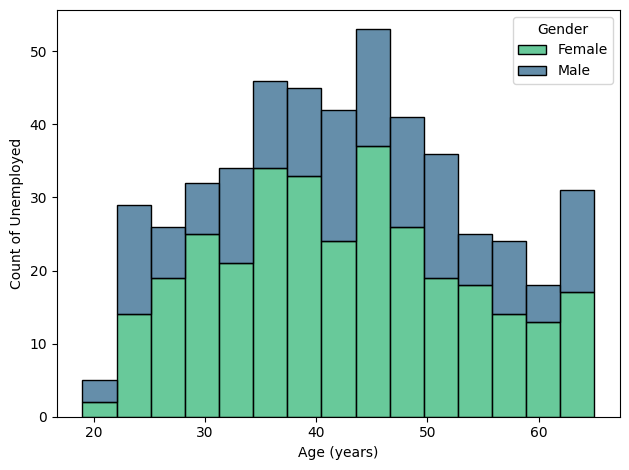

In [34]:
#Plot age Age vs count of unemployed (filtering on Occupation Category series) for males and females (Gender series)
#Define function for this
def plot_age_unemployed(data):
    """
    Plot Age vs Count of Unemployed for Males and Females.

    Parameters:
    data (pd.DataFrame): DataFrame containing data on unemployed individuals, including 'Age (years)' and 'Gender' columns.

    Returns:
    fig (matplotlib.figure.Figure): The generated matplotlib figure.
    """
    fig, ax = plt.subplots()
    sns.histplot(data, x='Age (years)', hue='Gender', bins=15, palette='viridis', multiple='stack', ax=ax)

    plt.xlabel('Age (years)')
    plt.ylabel('Count of Unemployed')
    plt.legend(title='Gender', labels=['Female', 'Male'])

    plt.tight_layout()
    
    return fig

age_vs_unemployed_gender = plot_age_unemployed(unemployed_df)

Certain ages are more likely to be unemployed than others. A higher proportion of people in their mid-thirties to early fifties are unemployed.

At every age, except for 18 year olds and early twenties, a higher proportion of females are unemployed compared to males.

*Summary of unemployment*

The unemployment rate for females is higher than for males (the male rate equals the UK unemployment rate). A higher proportion of people in their mid-thirties to early fifties are unemployed.

At every age, except for 18 year olds and early twenties, a higher proportion of females are unemployed compared to males. 

When interpreting unemployment rates, need to consider:

1. Women and men might choose different types of occupations, and some industries may have different unemployment rates.

2. Disparities in educational attainment can influence employment opportunities. 

3. Family responsibilities, such as caregiving, can still impact employment rates, especially as many of the jobs require commuting to the nearby cities.

4. Gender discrimination can play a role in employment disparities. Barriers to career advancement or wage gaps may affect unemployment rates.

**Marital Status**

Analysis undertaken in this section:

1. Summary stats of marital status by age
2. Distribution of marital status
3. Distribution of marital status by age
4. Distribution of divorce by gender
5. Crude rate
    - divorce
    - marriage
6. Divorce to marriage ratio

*Summary stats of Marital Status by Age*

In [35]:
#Group by Marital Status and Age columns
marital_status_age = df.groupby('Marital Status')['Age (years)']

#Print the summary statistics for Age by Marital Status
marital_status_age_stats = describe_with_iqr_grouped_df(marital_status_age)
marital_status_age_stats

,Count,Mean,Std,Min,25% (Q1),50% (Median),75% (Q3),Max,IQR
Marital Status,,,,,,,,,
Single,3004.0,38.2,14.2,18.0,25.8,37.0,48.0,96.0,22.2
Married,2220.0,50.5,16.7,18.0,38.0,48.5,62.0,116.0,24.0
Divorced,791.0,42.4,17.4,16.0,29.0,39.0,52.0,100.0,23.0
Widowed,380.0,67.9,17.2,19.0,66.0,71.0,78.2,105.0,12.2


Standard deviation is greatest for Divorced i.e. variability of all data points from the mean is the greatest. The 25th percentile is furthest from the mean for Divorced compared to Married, Single and Widowed, suggesting that the data is spread out over a wider range, producing greater variability (people are getting divorced over the widest age range). 

*Distribution of marital status*

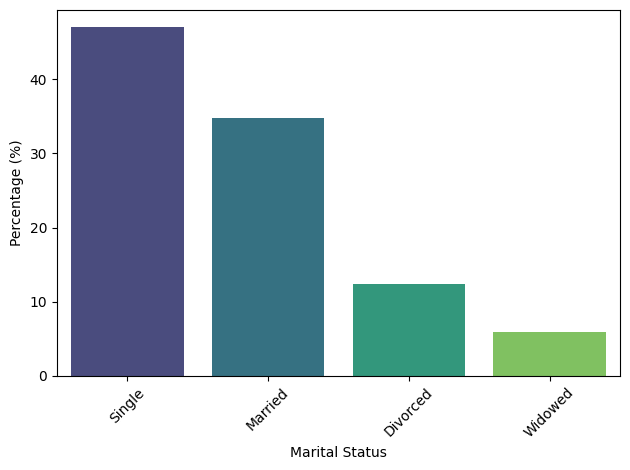

In [36]:
#Plot distribution of Marital Status
marital_status_distribution = plot_category_distribution(df, 'Marital Status')

*Boxplot of age vs marital status*

The box represents the interquartile range (IQR), which is the range between the first (25th percentile) and third (75th percentile) quartiles of the data. The height of the box shows the spread of the middle 50% of the data.

The median of the data is represented by the line within the box.

Whisker lines extending from the box indicate the range of the data, excluding outliers. They typically extend up to 1.5 times the IQR.
    
Individual points beyond the whiskers are considered outliers.

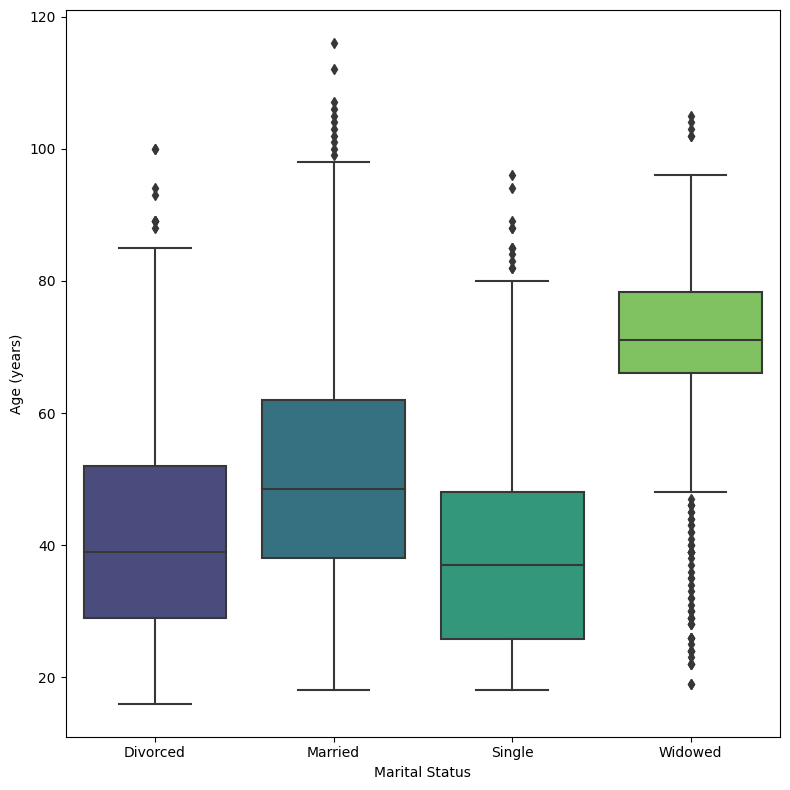

In [37]:
#Print boxplot of Age vs Marital Status
age_vs_marital_status = plot_boxplot(df, 'Marital Status', 'Age (years)')

The majority of divorced population are in middle age. The range of the data indicates that divorce occurs from legal age of marriage to old age.

Majority of widowed population between 65 and 78 years old. Several outliers for Widowed vs Age (years). It is possible for people to become widowed at 18, but not so likely as in old age.

*Divorced by gender*

In [38]:
#Filter rows where Marital Status is Divorced and Gender is Female or Male
female_divorcees = df[(df['Marital Status'].str.lower() == 'divorced') & (df['Gender'].str.lower() == 'female')]
male_divorcees = df[(df['Marital Status'].str.lower() == 'divorced') & (df['Gender'].str.lower() == 'male')]

#Count the number of male and female divorcees
count_female_divorcees = len(female_divorcees)
count_male_divorcees = len(male_divorcees)

print(f"Number of divorced females: {count_female_divorcees}")
print(f"Number of divorced males: {count_male_divorcees}")

Number of divorced females: 474
Number of divorced males: 317


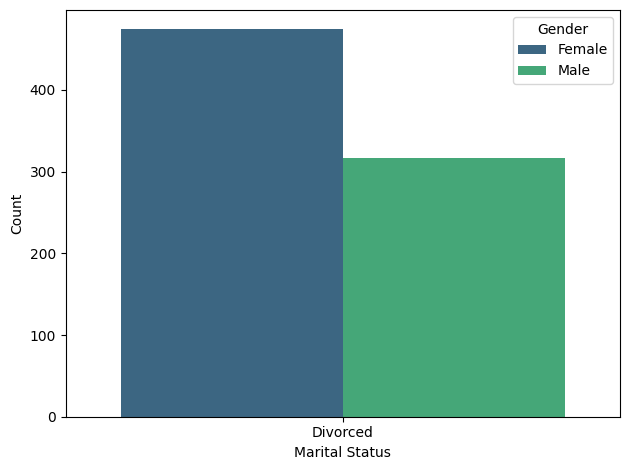

In [39]:
#Visualise number of male and female divorcees in sns plot
def plot_divorced_gender(divorced):
    """
    Visualise the counts of divorced individuals by gender in a seaborn count plot.

    Parameters:
    divorced (pandas.DataFrame): The DataFrame containing divorced individuals.

    Returns:
    fig (matplotlib.figure.Figure): The generated matplotlib figure.
    """
    #Create a count plot for divorced individuals by Gender
    fig, ax = plt.subplots()
    sns.countplot(x='Marital Status', hue='Gender', data=divorced, palette='viridis', ax=ax)

    plt.xlabel('Marital Status')
    plt.ylabel('Count')
    plt.tight_layout()

    plt.show()

    return fig

#Filter rows where Marital Status is Divorced
divorced = df[df['Marital Status'].str.lower() == 'divorced']

divorced_vs_gender = plot_divorced_gender(divorced)

Marital status by gender indicates there are more female divorcees than there are male, indicating some male divorcees may potentially leave the town. May also infer that more divorced women may remain due to care responsibilities for children.

To calculate crude divorce rate, marriage rate and divorce to marriage ratio, a baseline count of divorces is based on the number of divorced women because there is a greater number compared to men. 

Number of marriages is calculated by counting the number of ‘married’ individuals and dividing by two. Assuming that each marriage contains 2 individuals.

In [40]:
#Filter rows where the Marital Status is Married
married = df[df['Marital Status'].str.lower() == 'married']

#Filter rows where the Marital Status is Married and Gender is Female
female_married = df[(df['Marital Status'].str.lower() == 'married') & (df['Gender'].str.lower() == 'female')]

#Determine the total number of married people
married_population = len(married)
female_married_population = len(female_married)

#Divide married population by 2
count_marriages = married_population / 2

print(f"Number of marriages: {count_marriages:.0f}")

Number of marriages: 1110


*Crude divorce rate (calculated based on count of female divorcees divided by female married population and total population)*

In [41]:
#Calculate the crude and refined divorce rate (calculated based on count of female divorcees divided by married female population and total population)
refined_divorce_rate= (count_female_divorcees / female_married_population * 1000)
crude_divorce_rate = (count_female_divorcees / total_population * 1000)

print(f"Refined Divorce Rate per 1000 people: {refined_divorce_rate:.1f}")
print(f"Crude Divorce Rate per 1000 people: {crude_divorce_rate:.1f}")

Refined Divorce Rate per 1000 people: 424.4
Crude Divorce Rate per 1000 people: 56.6


The crude divorce rate gives a general overview of marriage in an area, but it does not take people who cannot marry into account. It includes young children, who are clearly not of marriageable age. In a town with large numbers of children or single adults, the crude divorce rate can seem low. In a town with few children and single adults, the crude divorce rate can seem high.

Refined divorce rate measures the number of divorces per 1,000 women married to men, so that all unmarried persons are left out of the calculation. This is a preferred calculation of divorce rate.

*Crude marriage rate (calculated based on number of marriages divided by total population)*

In [42]:
#Calculate the crude marriage rate (calculated based on number of marriages (married population divided by 2) divided by total population))
crude_marriage_rate = (count_marriages / total_population) * 1000

print(f"Crude Marriage Rate per 1000 people: {crude_marriage_rate:.1f}")

Crude Marriage Rate per 1000 people: 132.6


*Divorce to marriage ratio*

In [43]:
#Calculate the divorce-to-marriage ratio (based on count_female_divorcees divided by count_marriages)
divorce_to_marriage_ratio = count_female_divorcees / count_marriages

print(f"Divorce-to-Marriage Ratio: {divorce_to_marriage_ratio:.3f}")

Divorce-to-Marriage Ratio: 0.427


This ratio compares the number of divorces to the number of marriages (rather than number of married females). Based on the above ratio, 42.7% of marriages will end in divorce. This compares to refined divorce rate above of 42.4%.

As of 2021, the average divorce rate in the UK is 42%:

Harbour Family Law (2023) How many marriages end in divorce in the UK? Available online: https://www.harbourfamilylaw.co.uk/how-many-marriages-end-in-divorce-in-the-uk/ [Accessed 08/12/2023]

*Summary of marital status*

Majority of widowed population between 65 and 78 years old. Several outliers for Widowed vs Age (years). It is possible for people to become widowed at younger ages, but not so likely as in old age.

Divorce rate for the town matches the UK national divorce rate.

Divorce by gender indicates there are more female divorcees than there are male, indicating some male divorcees may potentially leave the town. May also infer that more divorced women may remain due to care responsibilities for children.

The majority of divorced population are in middle age. The range of the data indicates that divorce occurs from legal age of marriage to old age.

**Birth rate**

Analysis undertaken in this section:

1. Birth rate
    - For specific age range (25-29) of female population
    - For child-bearing women 
    - Crude birth rate
    - Evolving birth rate

Don't have any historical census data, so birth rate will be calculated using (many!) assumptions.

To determine birth rate for women of child-bearing age in the past year (the year of the census), need to determine the number of babies that are 0 years old, and select an age range for women of child-bearing age. E.g. choosing women in age range 25-29.

Making a massive assumption that women of child-bearing age are only in 25-29 age range (which is obviously not true), but similar methodology has been used for cohort component population projection: 

Measure Evaluation (n. d.) Lesson 8: the cohort component population projection method. Available online: https://measureevaluation.org/resources/training/online-courses-and-resources/non-certificate-courses-and-mini-tutorials/population-analysis-for-planners/lesson-8.html [Accessed 08/12/2023]

The birth rate is traditionally calculated using the total number of live births in a given period divided by the child-bearing population during that period. The birth rate is typically expressed over a specific time period (this calculation does not account for time).

This method has several drawbacks, in addition to the above assumptions being made, it also assumes the components of demographic change, mortality, fertility, and migration, will remain constant.

In [44]:
#Calculate number of children aged 0
number_of_children_zero = len(df[df['Age (years)'] == 0])
print(f"The number of children aged zero is: {number_of_children_zero}")

The number of children aged zero is: 88


In [45]:
#Calculate how many children were born in the year of the census as a fraction of the number of women aged 25-29. 
#Expressed as “births per 1000”.

def calculate_birth_rate(data, age_range, number_of_children_age, gender='Female'):
    """
    Calculate the birth rate per 1000 females in a specified age range and gender.

    Parameters:
    data (pd.DataFrame): Input DataFrame.
    age_range (str): Age range to filter the DataFrame.
    number_of_children_age (int): Number of births in the specified age range.
    gender (str, optional): Gender to filter the DataFrame. Default is 'Female'.

    Returns:
    float: The birth rate per 1000 females for specific age range
    """
    #Filter df for the specified age range and gender
    filtered_df = df[(df['Age Group'] == age_range) & (df['Gender'] == gender)]

    #Calculate the fraction of births per female in age range
    fraction_births_per_female = number_of_children_age / len(filtered_df)

    #Express the result as births per 1000 females in age range
    births_per_1000_females = fraction_births_per_female * 1000

    return births_per_1000_females

birth_rate_25_29 = calculate_birth_rate(df, '25-29', number_of_children_zero)
print(f"The birth rate per 1000 females aged 25-29 is: {birth_rate_25_29:.1f}")

The birth rate per 1000 females aged 25-29 is: 314.3


This birth rate is very high and is not indicative of the number of babies born to all women of childbearing age. 

As comparator, calculate the fraction of aged 0 babies born in the year as proportion of childbearing women (aged 15 to 44), also known as the fertility rate. 

The national (England and Wales) rate was 54.1 births per 1,000 women in 2021:

Office for National Statistics (2022) Births in England and Wales: 2021. Available online: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/bulletins/birthsummarytablesenglandandwales/2021 [Accessed 08/12/2023]

This method is used by the ONS for fertility rate calculation: 

Office for National Statistics (2023) Births in England and Wales: summary tables. Available online: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/datasets/birthsummarytables [Accessed 08/12/2023]

In [46]:
#Calculate how many children were born in the year of the census as a fraction of the number of women of childbearing age (15 to 44). 
#Expressed as “births per 1000”.
#Create a function to accept multiple age ranges
def calculate_birth_rate_multiple_ranges(data, target_age_ranges, number_of_children_age, gender='Female'):
    """
    Calculate the birth rate per 1000 females in a a number of age ranges provided as a list and gender.

    Parameters:
    data (pd.DataFrame): Input DataFrame.
    target_age_ranges (list): List of age ranges to combine for calculation.
    number_of_children_age (int): Number of births in the specified age range.
    gender (str, optional): Gender to filter the DataFrame. Default is 'Female'.

    Returns:
    float: The birth rate per 1000 females in the combined age range.
    """

    #Combine age ranges aged 15-44 and filter by gender
    age_range_combined_range_female = df[df['Age Group'].isin(target_age_ranges) & (df['Gender'] == gender)]

    #Calculate the total number of women in the combined age range
    total_women_combined_range = len(age_range_combined_range_female)

    #Calculate the fraction of births per female in the combined age range
    fraction_births_per_female_combined_range = number_of_children_age / total_women_combined_range

    #Express the result as births per 1000 females in the combined age range
    births_per_1000_females_combined_range = fraction_births_per_female_combined_range * 1000

    return births_per_1000_females_combined_range

target_age_ranges = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44']

birth_rate_15_44 = calculate_birth_rate_multiple_ranges(df, target_age_ranges, number_of_children_zero)
print(f"The birth rate per 1000 females aged 15-44 is: {birth_rate_15_44:.1f}")

The birth rate per 1000 females aged 15-44 is: 44.1


This rate is  lower than the rate for the England and Wales (2021).

This birth rate calculation assumes a uniform distribution of births across the specified age ranges. Assumes an equal likelihood of women in each age range giving birth, which may not accurately represent real-world scenarios where birth rates can vary by age.

The calculation assumes that the number of births is independent of other factors. In reality, various factors such as economic conditions, cultural norms, and healthcare access can influence birth rates. Population dynamics, migration, and other demographic factors are also not explicitly considered.

Does not take into account time. Assumes a constant birth rate within the specified age ranges. If the birth rate varies significantly over time or between different ranges, the calculated birth rate may not accurately represent the reality.

However, this is the best calculation to use because it generalises the least by accounting for childbearing age women and is more specific than using a crude birth rate for the total population (see below).

*Crude birth rate*

This is a “crude” birth rate because the denominator, population size, consists of the total population, not just the number of women or even the number of women of childbearing age.

WHO crude birth rate calculation:

World Health Organisation (2023) Crude birth rate. Available online: https://www.who.int/data/gho/indicator-metadata-registry/imr-details/1139 [Accessed 08/12/2023]

In [47]:
#Calculate the crude birth rate per 1,000 of total population
crude_birth_rate = (number_of_children_zero/total_population) * 1000

print(f"The crude birth rate per 1000 population is: {crude_birth_rate:.1f}")

The crude birth rate per 1000 population is: 10.5


**Evolving Birth Rate**

It is also difficult to determine if the birth rate was different in the past compared to the present because no historical data is provided.

Can try to evaluate this by determining the number of children aged 4 as a fraction of the number of women aged 30-34.

Then compare to birth rate for females aged 25-29 (calculated above).

In [48]:
#Calculate how many children are 4 as a fraction of the number of women aged 30-34. 
#Expressed as “births per 1000”.
number_of_children_four = len(df[df['Age (years)'] == 4])
print(f"The number of children aged four is: {number_of_children_four}")

#Calc for women age 30-34
birth_rate_30_34 = calculate_birth_rate(df, '30-34', number_of_children_four)
print(f"The birth rate per 1000 females aged 30-34 is: {birth_rate_30_34:.1f}")

#Determine if birth_rate_30_34 has increased or decreased or equals by comparing to birth_rate_25_29 
if birth_rate_30_34 > birth_rate_25_29:
    print("The birth rate for women aged 30-34 is greater than the birth rate for women aged 25-29.")
elif birth_rate_30_34 < birth_rate_25_29:
    print("The birth rate for women aged 30-34 is less than the birth rate for women aged 25-29.")
else:
    print("The birth rate for women aged 30-34 is equal to the birth rate for women aged 25-29.")

The number of children aged four is: 114
The birth rate per 1000 females aged 30-34 is: 368.9
The birth rate for women aged 30-34 is greater than the birth rate for women aged 25-29.


Based on the above calculation, the birth rate for women aged 30-34 is greater than the birth rate for women aged 25-29, suggesting a decline in birth rate. As previously explained above, this calculation makes a number of assumptions and it is not a particularly good indicator of how birth rate has changed over time. 

*Summary of birth rate*

The birth (fertility) rate for childbearing women is lower than the national birth rate. Calculation of evolving birth rate indicates that it is declining. This correlates with the age distribution plot of the total population (above under age analysis) where there are a lower number of 0-4 year olds compared to school-age children.

**Death rate**

Analysis undertaken in this section:

1. Death rate
2. Determine if population growing (due to birth rate exceeding death rate)

Compute the number of deaths per 1000 of the population (death rate) so can then compare to the birth rate. Have no historical data so some big assumptions will be made.

From the age pyramid of the population (above), there are lower numbers of older people in the population compared to younger ones.

Going to calculate death rate by determining the differential of the number of people in one age bracket, compared to the adjacent younger one e.g. (60-64 compared to 55-59) for aged 65 and over..

This approach assumes that the number of people in each generation is a constant when they were the same age. It is a way of determining how many might poeple have died over a 5-year period.

In [49]:
#Assumes that the number of people in each of these two generations was the same when they were the same age
#Group by Age Group and calculate the number of people in each Age Group
people_by_age_group = df.groupby('Age Group').size().reset_index(name='Number of People')

#Convert Age Group to a categorical type with custom ordering using age_labels (defined already above)
people_by_age_group['Age Group'] = pd.Categorical(people_by_age_group['Age Group'], categories=age_labels, ordered=True)

#Sort people_by_age_group by Age Group in descending order
people_by_age_group = people_by_age_group.sort_values(by='Age Group', ascending=False)

#Rename the columns for clarity
people_by_age_group.columns = ['Age Group', 'Number of People']

#Calculate the differential for each Age Group
people_by_age_group['Differential'] = (people_by_age_group['Number of People'] - people_by_age_group['Number of People'].shift(-1))
print(people_by_age_group)

   Age Group  Number of People  Differential
23   115-119                 1           0.0
22   110-114                 1          -3.0
21   105-109                 4          -7.0
20   100-104                11           1.0
19     95-99                10         -10.0
18     90-94                20         -63.0
17     85-89                83         -32.0
16     80-84               115         -47.0
15     75-79               162         -96.0
14     70-74               258         -22.0
13     65-69               280        -109.0
12     60-64               389         -68.0
11     55-59               457         -72.0
10     50-54               529        -137.0
9      45-49               666          -1.0
8      40-44               667         -38.0
7      35-39               705         132.0
6      30-34               573           2.0
5      25-29               571         -59.0
4      20-24               630          -6.0
3      15-19               636          50.0
2      10-

The positive and negative values in the "Differential" column represent the change in the number of people between adjacent age groups.

Positive values indicate an increase in the number of people from the lower age group to the higher age group.

Negative values indicate a decrease in the number of people from the lower age group to the higher age group.

The death rate below is calculated by estimating deaths by difference in age groups for those over 65. Assumes retired and more settled. Differences in these age groups more likely to be deaths in contrast to lower age groups where differences could be (and more likely due) to migration.

In [50]:
#Calculate death rate per annum and crude death rate for age 65 and over
#Filter rows for age groups 65-69 and above
#Use str.extract('(\d+)', expand=False to extract the numeric part of Age Group and then convert it to numeric values
inc_and_over_65_df = people_by_age_group[people_by_age_group['Age Group'].str.extract('(\d+)', expand=False).astype(int) >= 65]

#Sum the Death rate for the age ranges 65-69 and above
total_death_rate_65_and_over = inc_and_over_65_df['Differential'].sum()

#Divide total_death_rate_65_and_over by 5 to get the total death rate per annum for 65 and over
death_rate_per_annum_65_and_over = total_death_rate_65_and_over / 5

print(f"Total death rate per annum for age 65 and over: {abs(death_rate_per_annum_65_and_over):.1f}")

#Calculate crude death rate per 1000 of total population for the age group 65 and over
crude_death_rate_65_and_over = death_rate_per_annum_65_and_over / total_population * 1000

print(f"Crude death rate per 1000 for age 65 and over: {abs(crude_death_rate_65_and_over):.1f}")

Total death rate per annum for age 65 and over: 77.6
Crude death rate per 1000 for age 65 and over: 9.3


When compared to the overall age-standardised mortality rate (ASMR) for England and Wales in 2021 (10.1% rate per 1000 of population), the death rate per 1000 for age 65 and over is slightly under the national rate.

Office for National Statistics (2023) Deaths registered in England and Wales: 2021 (refreshed populations). Available online: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/bulletins/deathsregistrationsummarytables/2021refreshedpopulations [Accessed 08/12/2023]

To overall determine if the population is growing/declining/stable, compare the birth rate (for childbearing women, birth_rate_15_44) with the crude death rate (for people aged 65 and over, crude_death_rate_65_and_over).

In [51]:
#Create function to indicate if population is growing, declining or stable
def determine_population_growth_birth_death(birth_rate, death_rate):
    """
    Determine population growth, decline, or stability based on birth and death rates.

    Parameters:
    birth_rate (float): Birth rate value.
    death_rate (float): Death rate value.

    Returns:
    str: A string indicating the likely population trend.
    """
    #Compare birth rate and death rate
    if birth_rate > death_rate:
        return "Population is likely growing."
    elif birth_rate < death_rate:
        return "Population is likely declining."
    else:
        return "Birth rate equals death rate; population is stable."

print(determine_population_growth_birth_death(birth_rate_15_44, crude_death_rate_65_and_over))

Population is likely growing.


*Summary of death rate*

According to these calculations, the population is in all likelihood growing because the birth rate exceeds the death rate. However, both birth and death rate are below the national average.

**Migration (immigration and emigration)**

University students are technically immigrants/emigrants because every year there is new influx and efflux of students to the town, however can be considered a constant in terms of population growth.

**Immigration**

Analysis undertaken in this section:

1. Immigration rate
    - Percentage of lodgers/visitors in total population
    - Percentage of lodgers/visitors staying with families
    - Marital status of lodgers/visitors

Immigration can be inferred from number of lodgers and visitors.

Consider-

Occupation (to determine if more more likely to stay permanently)

Marital status (if married, more likely to return home)

In [52]:
#Filter lodgers and visitors from Relationship to Head of House
lodgers_and_visitors = df[
    (df['Relationship to Head of House'].str.lower() == 'lodger') | (df['Relationship to Head of House'].str.lower() == 'visitor')]

#Print the number of lodgers and visitors
print(lodgers_and_visitors['Relationship to Head of House'].value_counts())

#Calculate the percentage of lodgers and visitors of total population
percentage_lodgers_and_visitors = (len(lodgers_and_visitors) / total_population) * 100
print(f"The percentage of lodgers and visitors in the total population is: {percentage_lodgers_and_visitors:.1f}%")

#Calculate the number of lodgers and visitors per 1000 people
rate_per_1000_people = int((len(lodgers_and_visitors)/total_population) * 1000)
print(f"The number of lodgers and visitors per 1000 people in the total population is: {rate_per_1000_people:.1f}")

Lodger     280
Visitor     21
Name: Relationship to Head of House, dtype: int64
The percentage of lodgers and visitors in the total population is: 3.6%
The number of lodgers and visitors per 1000 people in the total population is: 35.0


In [53]:
#Filter for all strings where there is son or daughter in the Relationship to Head of House column
#This will capture adopted and step- children
sons_and_daughters = df[df['Relationship to Head of House'].str.lower().str.contains('son|daughter', na=False)]

#Extract unique house tuples from sons_and_daughters
unique_houses_with_children = sons_and_daughters[['House Number', 'Street']].drop_duplicates()

#Merge lodgers_and_visitors with unique_houses_with_children
lodgers_and_visitors_living_with_families = lodgers_and_visitors.merge(unique_houses_with_children,on=['House Number', 'Street'],how='inner')

#Calculate the percentage of lodgers living with families
percentage_lodgers_and_visitors_living_with_families = (len(lodgers_and_visitors_living_with_families) / len(lodgers_and_visitors)) * 100

print(f"The percentage of lodgers and visitors living with children is: {percentage_lodgers_and_visitors_living_with_families:.1f}%")

The percentage of lodgers and visitors living with children is: 71.1%


The majority of lodgers and visitors (71.1%) are staying in houses with children.

In [54]:
#Extract unique house tuples of House Number and Street from lodgers_and_visitors_living_with_families
unique_houses_with_lodgers_visitors = lodgers_and_visitors_living_with_families[['House Number', 'Street']].drop_duplicates()

#Filter for all members of family households containing lodgers and visitors in df
family_members_with_lodgers_visitors = df.merge(unique_houses_with_lodgers_visitors, on=['House Number', 'Street'], how='inner')

#Define list of marital statuses indicating a single-parent head
single_parent_marital_statuses = ['Divorced', 'Single', 'Widowed']

#Filter head of household and marital status of divorced, single or widowed
single_parent_heads = family_members_with_lodgers_visitors[
    (family_members_with_lodgers_visitors['Relationship to Head of House'] == 'Head') &
    (family_members_with_lodgers_visitors['Marital Status'].isin(single_parent_marital_statuses))
]

#Calculate the count of single-parent heads
count_single_parent_heads = single_parent_heads.shape[0]

#Calculate the count of lodgers and visitors living with families
count_lodgers_and_visitors = lodgers_and_visitors_living_with_families.shape[0]

#Calculate the percentage
percentage_single_parent_heads = (count_single_parent_heads / count_lodgers_and_visitors) * 100

print(f"The percentage of single-parent heads compared to the count of lodgers and visitors living with families is: {percentage_single_parent_heads:.1f}%")

The percentage of single-parent heads compared to the count of lodgers and visitors living with families is: 25.7%


For 25.7% of families with lodgers, the head of household is Single, Divorced or Widowed.

In [55]:
#Print unique occupations for lodgers_and_visitors to see if can identify if some more likely to stay due to job
unique_occupations = lodgers_and_visitors['Occupation'].unique()
print("Occupations for Lodgers and Visitors:")
print(unique_occupations)

Occupations for Lodgers and Visitors:
['Set designer' 'Holiday representative' 'Scientist, physiological'
 'Forensic psychologist' 'Surveyor, hydrographic' 'Tourism officer'
 'Programme researcher, broadcasting/film/video'
 'Chartered public finance accountant' 'Data scientist' 'Cabin crew'
 'Software engineer' 'Armed forces technical officer' 'Dancer'
 'English as a second language teacher' 'Tour manager'
 'Field seismologist' 'Unemployed' 'Accountant, chartered certified'
 'University Student' 'Research scientist (maths)' 'Heritage manager'
 'Social research officer, government' 'Database administrator'
 'Health and safety adviser' 'Programmer, systems' 'Public house manager'
 'Barrister' 'Health promotion specialist'
 'Psychologist, sport and exercise' 'Health and safety inspector'
 'Professor Emeritus' 'Financial manager' 'Multimedia programmer'
 'Engineer, drilling' 'Health service manager' 'Web designer'
 'Medical laboratory scientific officer' 'Medical sales representative'
 'Cl

Not possible from occupations of visitors and lodgers (above) to determine who is more likely to stay in the town permanently.

Consider marital status of visitors and lodgers.

If any are married I can infer that they are more likely to leave.

Exclude those who are divorced and are lodging after leaving their spouse because they do not classify as immigrating to the town.

Exclude widowed as assuming they were married and lived in the town and have not moved away due to family ties.

In [56]:
#Determine marital status of lodgers and visitors and display the count
marital_status_lodgers_and_visitors = lodgers_and_visitors['Marital Status'].value_counts()
print("Marital Status of Lodgers and Visitors:")
print(marital_status_lodgers_and_visitors)

Marital Status of Lodgers and Visitors:
Single      229
Divorced     64
Widowed       8
Name: Marital Status, dtype: int64


Lodgers and visitors to town are all single, divorced or widowed. No married.

Excluding divorcees and widowers from lodgers and visitors as not classifying as immigrants (as explained above). All immigrants are single.

In [57]:
#Exclude divorced from lodgers and visitors
lodgers_and_visitors_single = lodgers_and_visitors[lodgers_and_visitors['Marital Status'].str.lower() == 'single']
updated_lodgers_and_visitors = lodgers_and_visitors_single['Marital Status'].value_counts()
print("Marital Status of Lodgers and Visitors:")
print(updated_lodgers_and_visitors)

#Calculate the percentage of lodgers and visitors (exc divorced) of the total population
percentage_updated_lodgers_and_visitors = (len(lodgers_and_visitors_single) / total_population) * 100
print(f"The percentage of lodgers and visitors in the total population is: {percentage_updated_lodgers_and_visitors:.1f}%")

#Calculate the number of lodgers and visitors (exc divorced) per 1000
updated_rate_per_1000_people = (len(lodgers_and_visitors_single) / total_population) * 1000
print(f"Immigration rate based on the number of lodgers and visitors per 1000 people in the total population is: {updated_rate_per_1000_people:.1f}")

Marital Status of Lodgers and Visitors:
Single    229
Name: Marital Status, dtype: int64
The percentage of lodgers and visitors in the total population is: 2.7%
Immigration rate based on the number of lodgers and visitors per 1000 people in the total population is: 27.4


27.4 immigrants to the town per thousand people (excluding divorced and widowed).

*Summary of immigration*

The percentage of lodgers and visitors in the total population is: 3.6%
The number of lodgers and visitors per 1000 people in the total population is: 35.0
The percentage of lodgers and visitors living with children is: 71.1%

Not possible from occupations of visitors and lodgers to determine who is more likely to stay in the town permanently. 

Significant proportion of immigrants are living with families with children. For 25.7% of families with lodgers, the head of household is Single, Divorced or Widowed.

**Emigration**

Analysis undertaken in this section:

1. Emigration rate
    - Difference in make and female divorcees
2. Net migration

3. Additional exploration- net migration by age

Many people in the town are divorcees. Presumably, several of their former partners went to live elsewhere. This is hard to tell as people do change their surnames.

Infer how many divorcees left the town over the course of one year.

Calculate difference in male and female divorcees to infer emigration rate.

In [58]:
difference_male_female_divorcees = len(male_divorcees) - len(female_divorcees)
print(f"Difference in the number of male and female divorcees: {difference_male_female_divorcees}")

Difference in the number of male and female divorcees: -157


In [59]:
#Using only the difference in divorced males and females, calculate emigration from the town
#Calculate the emigration rate per 1000 of the total population (using absolute value)
emigration_rate_per_1000_population = int(abs(difference_male_female_divorcees) / total_population * 1000)
print(f"Emigration rate based on the difference in male and female divorcees per 1000 of total population: {emigration_rate_per_1000_population:.1f}")

Emigration rate based on the difference in male and female divorcees per 1000 of total population: 18.0


Using only the difference in divorced males and females, emigration from the town is 18 per thousand people.

*Calculate net migration (whether immigration exceeds emigration or vice versa)*

In [60]:
#Function to determine net migration
def determine_population_net_migration(emigration_rate, immigration_rate):
    """
    Determine population growth, decline, or stability based on migration rates.

    Parameters:
    emigration_rate (float): Emigration rate value.
    immigration_rate (float): Immigration rate value.

    Returns:
    str: A string indicating the likely population trend and net migration.
    """
    #Determine net migration
    net_migration = immigration_rate - emigration_rate

    if immigration_rate > emigration_rate:
        trend = "Population is likely growing."
    elif immigration_rate < emigration_rate:
        trend = "Population is likely declining."
    else:
        trend = "Emigration rate equals immigration rate; population is stable."

    result = f"{trend} Net migration: {net_migration:.2f}"
    return result

determine_population_net_migration(emigration_rate_per_1000_population, updated_rate_per_1000_people)

'Population is likely growing. Net migration: 9.36'

*Summary of migration*

The immigration rate (based on lodgers and visitors) exceeds the emmigration rate (based on difference in male and female divorcees) i.e. positive net migration. Suggesting immigration may also be a contributing factor to a growing population in the town, potentially translating to increased housing need.

This coupled with the increased birth rate over death rate also indicates a increasing town population.

The ONS predicts population growth in a similar manner, although it has access to time data for rate predictions. This enables prediction of population growth in the future. Their projections are based on assumptions that family size (children per woman), mortality rate and net international migration will not change over the projection period. Predictions are also independent of socioeconomic changes. 

Office for National Statistics (2022) National population projections: 2020-based interim. Available online: https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationprojections/bulletins/nationalpopulationprojections/2020basedinterim [Accessed 08/12/2023].

**Immigration and emigration by age group (alternative exploration)**

Calculate net immigration and emmigration based on age up to 65 (including students).
Divorced and widowed lodgers and visitors are included.
Rate of emigration per thousand and rate of immigration per thousand are calculated.

In [61]:
#Filter rows for age groups under 65
under_65_df = people_by_age_group[people_by_age_group['Age Group'].str.extract('(\d+)', expand=False).astype(float) < 65]

#Calculate net immigration and net emigration for under 65
net_immigration_under_65 = under_65_df['Differential'].where(under_65_df['Differential'] >= 0, 0).sum()
net_emigration_under_65 = under_65_df['Differential'].where(under_65_df['Differential'] < 0, 0).abs().sum()

#Calculate immigration rate and emigration rate for under 65s per 1000 people against total_population
immigration_rate_under_65_total = (net_immigration_under_65 / total_population) * 1000
emigration_rate_under_65_total = (net_emigration_under_65 / total_population) * 1000

#Filter rows for age groups under 65 in the original df
population_under_65_df = df[df['Age Group'].str.extract('(\d+)', expand=False).astype(float) < 65]

#Calculate the population under 65
population_under_65 = len(population_under_65_df)

#Calculate immigration rate and emigration rate for under 65s per 1000 people against population_under_65
immigration_rate_under_65_65 = (net_immigration_under_65 / population_under_65) * 1000
emigration_rate_under_65_65 = (net_emigration_under_65 / population_under_65) * 1000

print(f"Net Immigration under 65: {net_immigration_under_65}")
print(f"Net Emigration under 65: {net_emigration_under_65}")
print(f"Immigration Rate per 1000 people under 65 (total population): {immigration_rate_under_65_total:.1f}")
print(f"Emigration Rate per 1000 people under 65 (total population): {emigration_rate_under_65_total:.1f}")
print(f"Immigration Rate per 1000 people under 65 (population under 65): {immigration_rate_under_65_65:.1f}")
print(f"Emigration Rate per 1000 people under 65 (population under 65): {emigration_rate_under_65_65:.1f}")

Net Immigration under 65: 298.0
Net Emigration under 65: 381.0
Immigration Rate per 1000 people under 65 (total population): 35.6
Emigration Rate per 1000 people under 65 (total population): 45.5
Immigration Rate per 1000 people under 65 (population under 65): 40.1
Emigration Rate per 1000 people under 65 (population under 65): 51.3


This is making a massive assumption! The "Differential" column is being used to represent both immigration and emigration. Positive differentials are considered immigration, and negative differentials are considered emigration. This assumes that the "Differential" column accurately reflects migration patterns (which it doesn't!). 

Positive values represent an increase in the population within that age group. This might suggest immigration or natural population growth.

Negative values represent a decrease in the population within that age group. This might suggest emigration or a decline due to deaths.

The calculation assumes that changes in population within each age group are primarily driven by migration and not significantly influenced by other factors like natural population growth (births and deaths). 

Therefore, this is not a preferred way of determing migration over the calculation using lodgers, visitors and difference in divorcees above.

**Occupancy**

Analysis undertaken in this section:

1. Summary stats with skew, variance and excess kurtosis
2. Distribution of household occupancy by median age and salary
3. Hypothesis testing of household occupancy:
    - vs median age
    - vs median salary
4. Distribution of household occupancy by age and marital status
5. Determine over- or under-occupancy of town using:
    - median by street
    - median of town
6. Determine percentage of houses that are occupied by families.
7. Determine percentage of houses with immigrants (lodgers/visitors) that are over-occupied.

Have a Household Occupancy series that created during data cleaning (see 'Census Data Cleaning' notebook)

*Summary stats with skewness, variance and kurtosis*

In [62]:
#Create updated summary_stat function to print stats including skewness, kurtosis and variance for Household Occupancy 
def summary_stats_with_skew_variance_kurtosis(data, column):
    """
    Generate a summary statistics table for a specified column in a DataFrame.

    Parameters:
    data (pd.DataFrame): Input DataFrame.
    column (str): Name of the column for which statistics are calculated.

    Returns:
    pd.DataFrame: Summary statistics table.
    """
    #Run .describe() on column in df
    summary_stats = data[column].describe()

    #Calculate additional statistics
    try:
        mode = stats.mode(data[column], keepdims=True)
    except statistics.StatisticsError:
        mode = "Mode does not exist in this dataset"
    skew_value = stats.skew(data[column])
    kurtosis_value = stats.kurtosis(data[column], fisher=True)
    variance_value = data[column].var()
    
    #Add additional statistics to the .describe() output
    summary_stats['Mode'] = mode
    summary_stats['Skewness'] = skew_value
    summary_stats['Excess Kurtosis'] = kurtosis_value
    summary_stats['Variance'] = variance_value

    #Calculate IQR
    q1 = summary_stats['25%']
    q3 = summary_stats['75%']
    iqr = q3 - q1

    #Add IQR to the .describe() output
    summary_stats['IQR'] = iqr

    return summary_stats

occupancy_stats = summary_stats_with_skew_variance_kurtosis(df, 'Household Occupancy')
occupancy_stats

count                     8370.0
mean                    4.096057
std                     3.030391
min                          1.0
25%                          2.0
50%                          4.0
75%                          5.0
max                         22.0
Mode               ([3], [1659])
Skewness                2.701979
Excess Kurtosis         9.945905
Variance                9.183268
IQR                          3.0
Name: Household Occupancy, dtype: object

Mean (average) value of 4.1. On average, each household has 4 occupants.

The median value of 4.0 indicates that half of the households in the town have an occupancy of 4 or less.

Mode value of 3.0. The mode is the most frequently occurring value in the distribution. In this case, it represents the most common household occupancy.

The IQR of 3.0 represents the range of household occupancy where the central 50% of households fall. It is the difference between the third quartile (Q3) and the first quartile (Q1).

A skewness of 2.7 indicates that the distribution is positively skewed, meaning that it has a long tail on the right side. In the context of household occupancy, this suggests that there are some households with higher-than-average occupancy.

A kurtosis (excess) of 9.96 indicates that the distribution has heavier tails and a sharper peak than a normal distribution. This suggests that there may be some outliers or extreme values in the distribution.

The positive skewness (2.70) and kurtosis (9.96) suggest that the distribution is not perfectly normal and is right-skewed.
The median (4.0) might be a more robust measure of central tendency compared to the mean, because of outliers.
A mode of 3 indicates a concentration of smaller household sizes.

Need a measure less sensitive to extreme values than mean, therefore median is a better choice.

*Occupancy distribution*

Visualise the median of the town occupancy distribution, using density plot along with vertical line indicating the position of median, to observe the central tendency and the spread of the data.

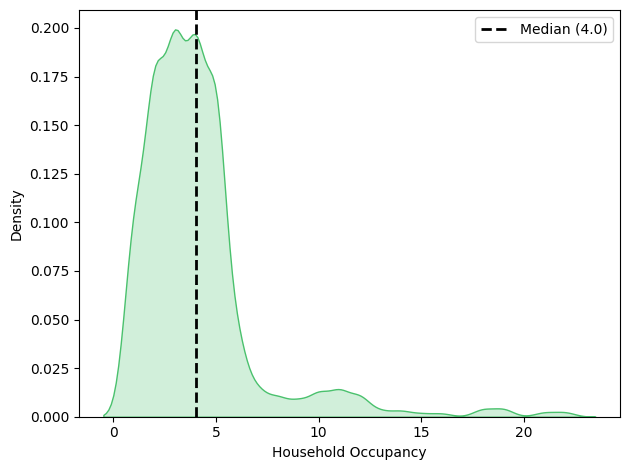

In [63]:
median_town_occupancy = df['Household Occupancy'].median()

def plot_household_occupancy_density(data):
    """
    Create a density plot of household occupancy with vertical lines for the median.

    Parameters:
    data (pd.DataFrame): Input DataFrame.

    Returns:
    - fig (matplotlib.figure.Figure): The generated matplotlib figure.
    """
    #Create a density plot
    fig, ax = plt.subplots()
    sns.kdeplot(data['Household Occupancy'], fill=True, color=sns.color_palette('viridis')[4], ax=ax)

    #Add vertical line for median
    plt.axvline(median_town_occupancy, color='black', linestyle='dashed', linewidth=2, label=f'Median ({median_town_occupancy:.1f})')

    ax.set(xlabel='Household Occupancy', ylabel='Density')
    ax.legend()
    plt.tight_layout()

    return fig

occupancy_distribution = plot_household_occupancy_density(df)

Visualises the kurtosis and skewness, showing median is a better choice for occupancy determination.

*Distribution of Household Occupancy by Median Age and Salary*

In [64]:
#Create a new df with unique house numbers on each street and include the mean age and mean salary and household occupancy
mean_stats_by_household = df.groupby(['Street', 'House Number']).agg({
    'Age (years)': 'mean',
    'Salary (GBP)': 'mean',
    'Household Occupancy': 'first'
}).reset_index()

#Round mean salary and mean age to 1 decimal place
mean_stats_by_household['Salary (GBP)'] = mean_stats_by_household['Salary (GBP)'].round(1)
mean_stats_by_household['Age (years)'] = mean_stats_by_household['Age (years)'].round(1)

#Rename columns
mean_stats_by_household = mean_stats_by_household.rename(columns={
    'Age (years)': 'Mean Age (years)',
    'Salary (GBP)': 'Mean Salary (GBP)'
})

#display(mean_stats_by_household)

#Count occurrences for each unique value of household occupancy
occupancy_counts = mean_stats_by_household['Household Occupancy'].value_counts().reset_index()
occupancy_counts.columns = ['Household Occupancy', 'Count']

#Calculate median salary and median age for each occupancy count
median_stats_by_occupancy_count = mean_stats_by_household.groupby('Household Occupancy').agg({
    'Mean Age (years)': 'median',
    'Mean Salary (GBP)': 'median'
}).reset_index()

#Rename columns
median_stats_by_occupancy_count = median_stats_by_occupancy_count.rename(columns={
    'Mean Age (years)': 'Median Age (years)',
    'Mean Salary (GBP)': 'Median Salary (GBP)'
})

#Merge the counts and median stats
occupancy_age_salary = pd.merge(occupancy_counts, median_stats_by_occupancy_count, on='Household Occupancy')

display(occupancy_age_salary)

,Household Occupancy,Count,Median Age (years),Median Salary (GBP)
0,1,901,58.00,22584.00
1,2,766,40.00,18621.00
2,3,553,32.30,21881.00
3,4,409,29.50,18016.20
4,5,296,29.20,16906.00
5,6,59,30.00,18449.50
6,7,17,25.60,11509.90
7,11,11,34.10,18504.50
8,8,11,29.00,18898.10
9,10,11,31.20,20782.70


Appears to be a correlation in older median age with lower occupancy (1 and 2). No apparent correlation between median salary and occupancy.

Plot Median Age and Median Salary against Household Occupancy to see if there is a visual correlation.

Fit LOBF and calculate R2 for linear correlation.

R-squared for Median Age: 0.0228
R-squared for Median Salary: 0.0022


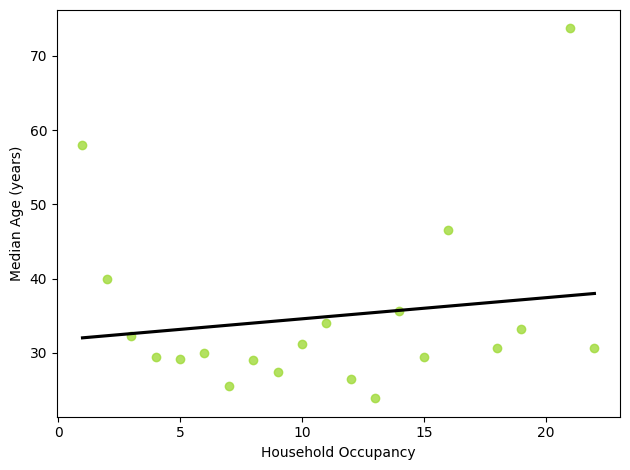

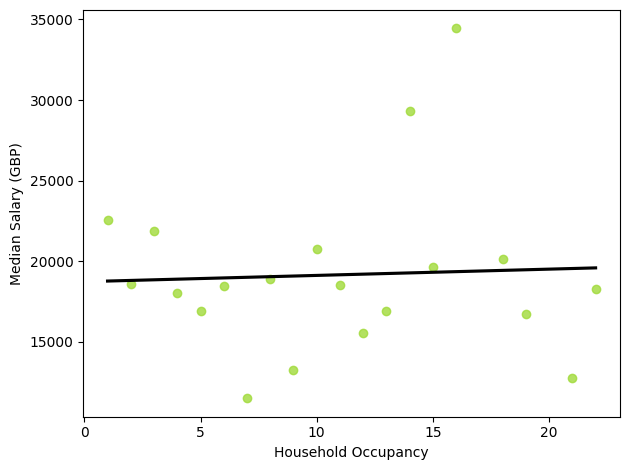

In [65]:
#Function for calculating R-squared
def calculate_r_squared(x, y):
    """
    Calculate the R-squared value for a linear regression.

    Parameters:
    x (array): Independent variable.
    y (array): Dependent variable.

    Returns:
    - float: R-squared value.
    """
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return r_value ** 2

#Calculate R-squared for Median Age
r_squared_age = calculate_r_squared(occupancy_age_salary['Household Occupancy'], occupancy_age_salary['Median Age (years)'])
print(f'R-squared for Median Age: {r_squared_age:.4f}')

#Calculate R-squared for Median Salary
r_squared_salary = calculate_r_squared(occupancy_age_salary['Household Occupancy'], occupancy_age_salary['Median Salary (GBP)'])
print(f'R-squared for Median Salary: {r_squared_salary:.4f}')

#Scatter plot with linear regression line for Median Age 
sns.regplot(x='Household Occupancy', y='Median Age (years)', data=occupancy_age_salary, ci=None, line_kws={'color': 'black'}, scatter_kws={'color': sns.color_palette('viridis')[5]})
plt.xlabel('Household Occupancy')
plt.ylabel('Median Age (years)')
plt.tight_layout()
plt.show()

#Scatter plot with linear regression line for Median Salary
sns.regplot(x='Household Occupancy', y='Median Salary (GBP)', data=occupancy_age_salary, ci=None, line_kws={'color': 'black'}, scatter_kws={'color': sns.color_palette('viridis')[5]})
plt.xlabel('Household Occupancy')
plt.ylabel('Median Salary (GBP)')
plt.tight_layout()
plt.show()

Low R2 values suggests no linear correlation between values.

Median Age vs Occupancy might be polynomial fit. To determine this, could fit a linear regression model and appropriate polynomial model and identify best fit using ANOVA analysis with hypothesis testing. 

However, going to hypothesis test using Spearman correlation (alongside Pearson) to determine if correlation is likely in case of non-linear relationship.

Hypothesis testing:

Null Hypothesis: There is no correlation between Household Occupancy and Median Age.

Alternative Hypothesis: There is a correlation between Household Occupancy and Median Age.

p-value is 0.05.

In [66]:
#Run correlation_tests functon on Median Age
correlation_tests(occupancy_age_salary['Household Occupancy'], occupancy_age_salary['Median Age (years)'])

Pearson correlation coefficient: 0.151
P-value (Pearson): 0.525
Spearman rank correlation coefficient: 0.099
P-value (Spearman): 0.677
Null hypothesis stands: No significant correlation.


The Spearman correlation coefficients for Median Age is 0.099. The corresponding p-values is 0.6772.

Therefore, failing to reject the null hypothesis, there is no significant monotonic relationship between Household Occupancy and Median Age .

The correlation does not imply causation, and the lack of a significant correlation in the data does not imply the absence of a real-world relationship.

*Household Occupancy by Age and Marital Status*

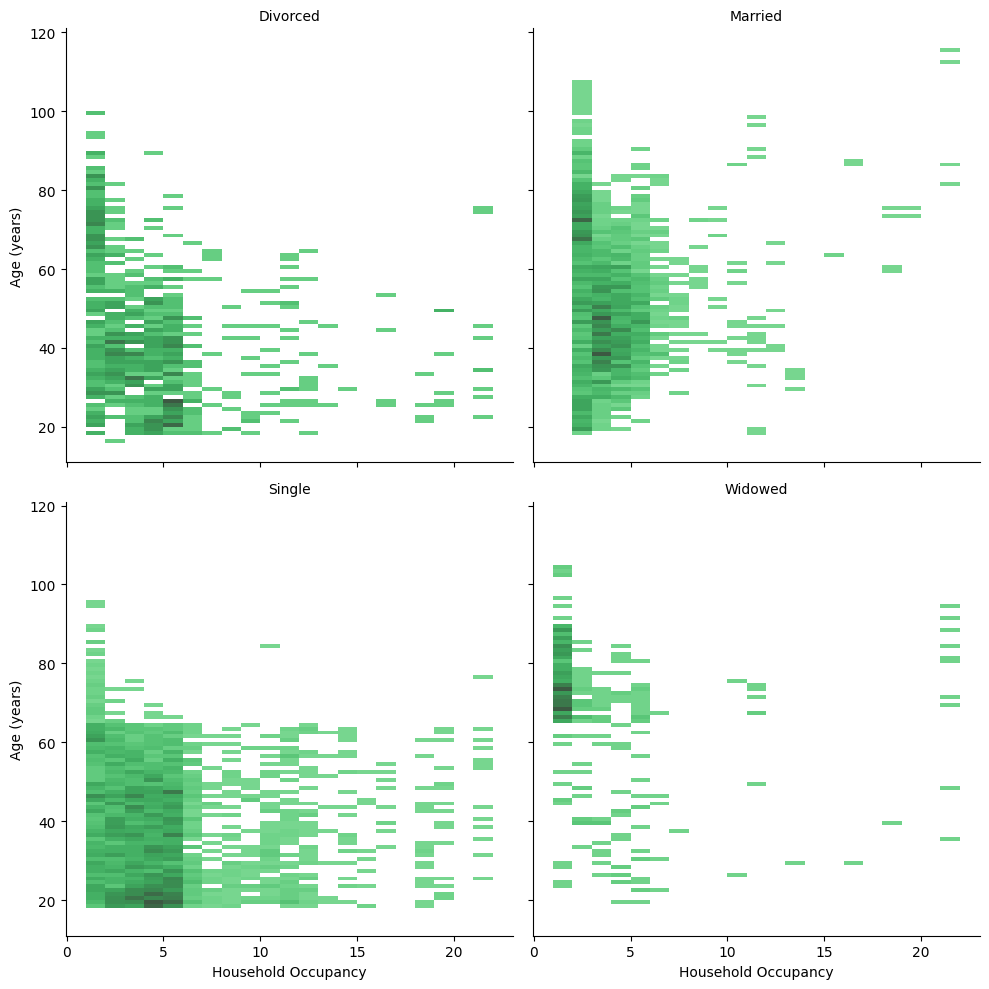

In [67]:
#Create function for FacetGrid with separate plots for each Marital Status plotting Household Occupancy vs Age
def plot_marital_status_age_occupancy(data):
    """
    Create a FacetGrid with separate plots for each Marital Status, plotting Household Occupancy vs Age.

    Parameters:
    data (pd.DataFrame): Input DataFrame containing the data.

    Returns:
    fig (matplotlib.figure.Figure): The generated matplotlib figure.
    """
    #Create a FacetGrid with separate plots for each Marital Status
    marital_status_age_occupancy = sns.FacetGrid(data, col="Marital Status", height=5, col_wrap=2)

    #Use histplot for each subplot with smaller bin width
    marital_status_age_occupancy.map_dataframe(
        sns.histplot, x='Household Occupancy', y='Age (years)', bins=25, binwidth=1, color=sns.color_palette('viridis')[4], cbar=False
    )

    marital_status_age_occupancy.set_axis_labels("Household Occupancy", "Age (years)")
    marital_status_age_occupancy.set_titles(col_template="{col_name}")
    plt.tight_layout()

    return marital_status_age_occupancy.fig

marital_status_age_occupancy = plot_marital_status_age_occupancy(df)

According to the above plots, widowers tend towards lower occupancy households. Household occupancy is between 2 and 5 primarily, with a large number with occupancy of 2, showing proportion potentially of married couples with and without children. Divorced and single status is spread more across the plot, supporting the idea that these individuals may well live with others in shared households (rented accommodation, student accommodation) and flats.

Determine occupancy using the median occupancy for each street to account for potential outliers (justified by analysis of skewness and excess kurtosis above).

The median occupancy of the town is already known as 4. 

However, median occupancy by street is selected as the desired measure of occupancy, providing future opportunity to explore localised regions within the town that are over-occupied for development purposes.

In [68]:
median_occupancy_by_street = df.groupby('Street')['Household Occupancy'].median().reset_index()
print(median_occupancy_by_street.round(2))

                 Street  Household Occupancy
0    Aethelred Crescent                  2.0
1     Aethelred Heights                  4.0
2            Ahmed Spur                  2.0
3        Anvilgain Road                  2.0
4           Aries Spire                 13.0
..                  ...                  ...
99       William Bypass                  4.0
100         Willow Road                  5.5
101          York Drive                  2.0
102     Yorkwalk Avenue                  1.0
103         Yucca Drive                  4.0

[104 rows x 2 columns]


Calculate difference between the average occupancy and the number of people who are actually living in a given house. This operates as a proxy to determine over-occupancy.

In [69]:
#Create a new df with unique house numbers on each street and include the household occupancy
unique_houses_occupancy = df.groupby(['Street', 'House Number']).agg({
    'Household Occupancy': 'first',  # Take the first value as it's the same for each group
}).reset_index()

display(unique_houses_occupancy)

,Street,House Number,Household Occupancy
0,Aethelred Crescent,1,1
1,Aethelred Crescent,2,3
2,Aethelred Crescent,3,2
3,Aethelred Crescent,4,1
4,Aethelred Crescent,5,1
...,...,...,...
3057,Yucca Drive,24,2
3058,Yucca Drive,25,3
3059,Yucca Drive,26,4
3060,Yucca Drive,27,4


In [70]:
#Determine number of houses with families with children (unique_houses_with_children) from total number of houses in unique_houses_occupancy
count_family_houses = len(unique_houses_with_children)
count_houses = len(unique_houses_occupancy)

print(f"Number of family houses: {count_family_houses}")
print(f"Number of houses: {count_houses}")

Number of family houses: 1381
Number of houses: 3062


In [71]:
#Calculate the percentage of family houses as a proportion of total houses
percentage_family_houses = (count_family_houses / count_houses) * 100

print(f"Percentage of family houses as a proportion of total houses: {percentage_family_houses:.1f}%")

Percentage of family houses as a proportion of total houses: 45.1%


In [72]:
#Create dictionaries mapping streets to median household occupancy by street
median_occupancy_dict = dict(zip(median_occupancy_by_street['Street'], median_occupancy_by_street['Household Occupancy']))

#Create a new column 'Occupancy Difference' for median in grouped_df using map and round to 2 decimal places
unique_houses_occupancy['Occupancy Difference (Median Occupancy Street)'] = unique_houses_occupancy['Street'].map(median_occupancy_dict) - unique_houses_occupancy['Household Occupancy']
unique_houses_occupancy['Occupancy Difference (Median Occupancy Street)'] = unique_houses_occupancy['Occupancy Difference (Median Occupancy Street)'].round(2)

#display(grouped_df)
unique_houses_occupancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Street                                          3062 non-null   object 
 1   House Number                                    3062 non-null   int64  
 2   Household Occupancy                             3062 non-null   int64  
 3   Occupancy Difference (Median Occupancy Street)  3062 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 95.8+ KB


The Occupancy Difference represents the difference between the median household occupancy on a given street and the actual household occupancy for a specific house on that street. 

If Occupancy Difference is positive, the actual household occupancy for that specific house is less than the  median household occupancy for houses on the same street. This suggests that the house is under-occupied compared to the median on the street.

If Occupancy Difference is negative, the actual household occupancy for that specific house is greater than the median household occupancy for houses on the same street. This suggests that the house is over-occupied compared to the median on the street.

In [73]:
#Function to categorise occupancy difference
def categorise_occupancy_difference(diff):
    """
    Categorise the occupancy difference into one of the following categories:
    'Under-occupied' if the difference is greater than 0.
    'Over-occupied' if the difference is less than 0.
    'Equal to occupancy' if the difference is 0.

    Parameters:
    diff (float): The occupancy difference to be categorised.

    Returns:
    str: The category of occupancy difference.
    """
    if diff > 0:
        return 'Under-occupied'
    elif diff < 0:
        return 'Over-occupied'
    else:
        return 'Equal to occupancy'

#Apply the categorisation function to the median 'Occupancy Difference' column
unique_houses_occupancy['Occupancy Category (Median Occupancy Street)'] = unique_houses_occupancy['Occupancy Difference (Median Occupancy Street)'].apply(categorise_occupancy_difference)

Calculate the difference in the sum of the difference between over-occupancy and under-occupancy for all streets to determine if overall, the town is over or under-occupied.

In [74]:
def calculate_overall_occupancy_difference(data):
    """
    Calculate the overall occupancy difference for a town based on differences in over-occupied and under-occupied streets.

    Parameters:
    data (pd.DataFrame), the input DataFrame grouped by streets

    Returns:
    str, a message indicating whether the town is over-occupied, under-occupied, or neither
    """
    #Sum the differences for over-occupied streets
    sum_over_occupied = data.loc[data['Occupancy Category (Median Occupancy Street)'] == 'Over-occupied', 'Occupancy Difference (Median Occupancy Street)'].sum()

    #Sum the differences for under-occupied streets
    sum_under_occupied = data.loc[data['Occupancy Category (Median Occupancy Street)'] == 'Under-occupied', 'Occupancy Difference (Median Occupancy Street)'].sum()

    overall_difference = sum_over_occupied + sum_under_occupied

    #Determine overall occupancy status
    if overall_difference > 0:
        return "Overall, the town is over-occupied."
    elif overall_difference < 0:
        return "Overall, the town is under-occupied."
    else:
        return "Overall, the town is neither over nor under-occupied."

calculate_overall_occupancy_difference(unique_houses_occupancy)

'Overall, the town is over-occupied.'

*Boxplot of occupancy difference (based on mean of IQR) by street*

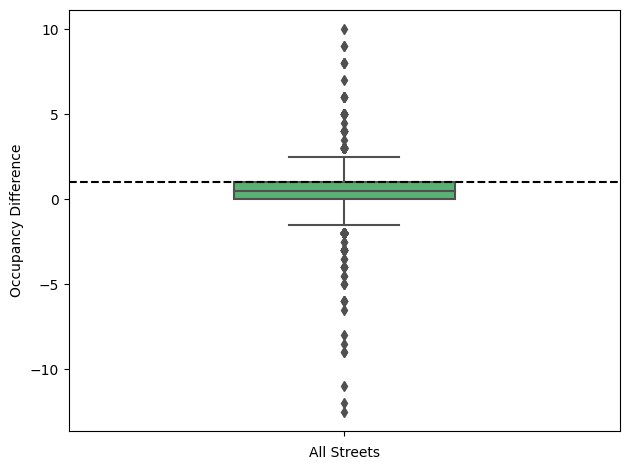

In [75]:
#Calculate the mean of IQRs for the median occupancy differences
mean_iqr_median = unique_houses_occupancy['Occupancy Difference (Median Occupancy Street)'].quantile(0.75) - unique_houses_occupancy['Occupancy Difference (Median Occupancy Street)'].quantile(0.25) 

#Plot combined boxplot with mean of IQR, whiskers, and outliers for all streets (median)
sns.boxplot(y='Occupancy Difference (Median Occupancy Street)', data=unique_houses_occupancy, color=sns.color_palette('viridis')[4], width=0.4, showfliers=True, showcaps=True)
plt.axhline(y=mean_iqr_median, color='black', linestyle='--', label='Mean IQR (Median)')
plt.xlabel('All Streets')
plt.ylabel('Occupancy Difference')
plt.tight_layout()

plt.show()

Compare to the median occupancy of the town.

In [76]:
#Calculate the occupancy difference (median occupancy) for each row in grouped_df (for whole town)
unique_houses_occupancy['Occupancy Difference (Median Occupancy of Town)'] = unique_houses_occupancy['Household Occupancy'] - median_town_occupancy

In [77]:
#Apply categorisation function to the 'Occupancy Difference of Town' column
unique_houses_occupancy['Occupancy Category (Median Occupancy of Town)'] = unique_houses_occupancy['Occupancy Difference (Median Occupancy of Town)'].apply(categorise_occupancy_difference)

In [78]:
#Determine over-occupancy based on median household occupancy for town
#Calculate the total number of houses
total_houses = len(unique_houses_occupancy)

#Count the number of houses in each occupancy category
category_counts_med_town = unique_houses_occupancy['Occupancy Category (Median Occupancy of Town)'].value_counts()

#Calculate the percentage of houses in each category
percentage_over_occupied_med_town = (category_counts_med_town['Over-occupied'] / total_houses) * 100
percentage_under_occupied_med_town = (category_counts_med_town['Under-occupied'] / total_houses) * 100
percentage_equal_to_med_town = (category_counts_med_town['Equal to occupancy'] / total_houses) * 100

#Print the percentages
print(f"Percentage of Houses in 'Over-occupied' category for median of town: {percentage_over_occupied_med_town:.1f}%")
print(f"Percentage of Houses in 'Under-occupied' category for median of town: {percentage_under_occupied_med_town:.1f}%")
print(f"Percentage of Houses in 'Equal to median occupancy' category for median of town: {percentage_equal_to_med_town:.1f}%")

Percentage of Houses in 'Over-occupied' category for median of town: 72.5%
Percentage of Houses in 'Under-occupied' category for median of town: 14.1%
Percentage of Houses in 'Equal to median occupancy' category for median of town: 13.4%


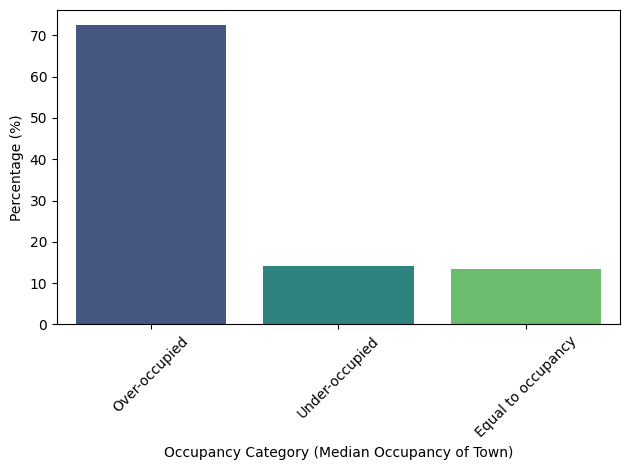

In [79]:
#Plot occupancy categories calculated from median occupancy of town
occupancy_category_distribution_median_town = plot_category_distribution(unique_houses_occupancy, 'Occupancy Category (Median Occupancy of Town)')

In [80]:
#Determine if houses with lodgers/visitors are over-occupied
#Filter houses with lodgers/visitors
houses_with_lodgers_visitors = lodgers_and_visitors[['House Number', 'Street']].drop_duplicates()

#Identify over-occupied houses based on the Household Occupancy column
#Using median_town_occupnacy (4) as threshold for over-occupansy
over_occupied_houses = houses_with_lodgers_visitors[
    houses_with_lodgers_visitors.apply(lambda row: df[(df['House Number'] == row['House Number']) & (df['Street'] == row['Street'])]['Household Occupancy'].max() > median_town_occupancy, axis=1)
]

#Calculate the percentage of over-occupied houses
percentage_over_occupied_houses = (len(over_occupied_houses) / len(houses_with_lodgers_visitors)) * 100

print(f"The percentage of houses with lodgers/visitors that are over-occupied is: {percentage_over_occupied_houses:.1f}%")

The percentage of houses with lodgers/visitors that are over-occupied is: 53.5%


*Summary of occupancy*

Based on the median occupancy for the town (4) more houses are over-occupied, than under-occupied. This correlates to median by street (showing over-occupation also).

Chosen median for street as indicator of occupancy for this dataset because it gives a more localised view of occupancy, in contrast to more generalised median for town. 

This helps identifying potential localised regions of over-occupancy should this analysis be required in the future. 

There are outliers on streets as represented by the distribution of occupancy against number of houses (skewness and excess kurtosis indicate this) where there may be blocks of flats, student accommodation etc. so median is a better metric to choose (rather than mean) to account for outliers in the dataset.

45% of the houses are occupied by families.

The percentage of houses with lodgers/visitors that are over-occupied is 53.5%. As determined above, the majority (71.1%) of lodgers and visitors are staying in homes with children. Roughly a quarter of families living with a lodger, the head of the household is unmarried. In these instances, homes may be over-occupied because family members are sharing bedrooms to accommodate a lodger, or families cannot downsize and are renting rooms for affordability reasons. Families with a divorced, single or widowed parent may also be renting a room out to lodgers for affordability reasons and to avoid downsizing.

Widowers tend towards lower occupancy households. Household occupancy for married population is between 2 and 5 primarily, with a large number with occupancy of 2, showing proportion potentially of married couples with and without children. Divorced and single status is spread more across the plot, supporting the idea that these individuals may live alone or with others in shared household (rented accommodation, student accommodation) and flats.

**Religion**

Analysis undertaken in this section:

1. Summary stats
2. Distribution of religion
3. Distributiion of NaN religion
4. Distribution of religion by age
5. Religion inheritance
6. Distribution of religions of those who will die in the next 10 years
7. Distribution of religions of those who will reach the age of 16 or older in the next 10 years

For each religion compute the count, mean, median, std dev, and IQR of age for the population.

In [81]:
#Group by religion on age
religion_age = df.groupby('Religion')['Age (years)']

religion_age_stats = describe_with_iqr_grouped_df(religion_age)
religion_age_stats

,Count,Mean,Std,Min,25% (Q1),50% (Median),75% (Q3),Max,IQR
Religion,,,,,,,,,
None,2842.0,42.1,16.7,18.0,29.0,40.0,52.0,107.0,23.0
Christian,1956.0,49.9,18.2,18.0,36.0,51.0,62.0,116.0,26.0
Undeclared,1748.0,8.0,4.5,0.0,4.0,8.0,12.0,15.0,8.0
Catholic,884.0,44.1,16.2,18.0,34.0,42.0,51.0,102.0,17.0
Methodist,499.0,45.7,17.8,18.0,32.0,43.0,57.0,100.0,25.0
Muslim,97.0,34.6,14.9,18.0,24.0,29.0,42.0,94.0,18.0
Sikh,40.0,32.2,13.8,18.0,25.8,29.0,33.0,73.0,7.2
Jewish,36.0,39.6,15.0,19.0,27.0,36.5,48.0,70.0,21.0
Buddhist,3.0,29.7,18.5,19.0,19.0,19.0,35.0,51.0,16.0


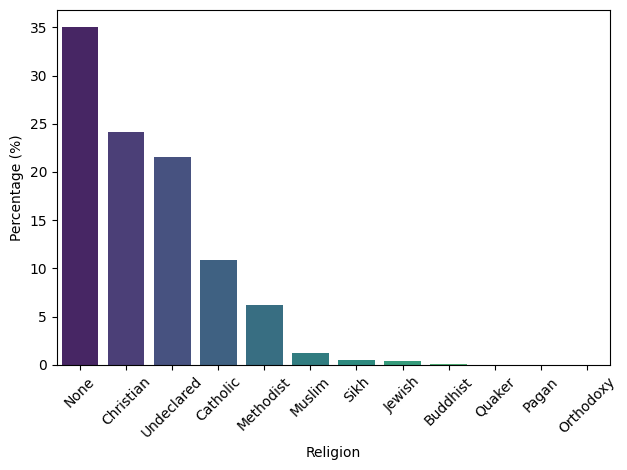

In [82]:
#Plot religion distribution
religion_distribution = plot_category_distribution(df, 'Religion')

Four religions (muslim, sikh, jewish and buddhist) with lower counts, also have lower median age (less than 40 years old).

In [83]:
#List of less popular religions to consider
less_popular_religions = ['Muslim', 'Sikh', 'Jewish', 'Buddhist']

#Filter df for the specified religions
less_popular_religions_df = df[df['Religion'].isin(less_popular_religions)]

#Calculate the total count of people with the specified religions
total_count_less_popular_religions = len(less_popular_religions_df)

#Calculate the percentage of people with the specified religions
percentage_less_popular_religions = (total_count_less_popular_religions / total_population) * 100

print(f"The percentage of people with Muslim, Sikh, Jewish, or Buddhist religions is: {percentage_less_popular_religions:.1f}%")

The percentage of people with Muslim, Sikh, Jewish, or Buddhist religions is: 2.1%


Percentage of NaN (adults who did not enter any value (left blank) for Religion) of the total population

In [84]:
#Filter individuals with NaN religion
null_religion = df[df['Religion'].isna()]

#Number of NaN values in null_religion
count_of_null_religion = len(null_religion)
print(f"Count of NaN as religion: {count_of_null_religion}")

#Calculate the percentage of total population with NaN values in Religion
percentage_null_religion = (count_of_null_religion / total_population) * 100
print(f"The percentage of the total population with NaN as Religion is: {percentage_null_religion:.1f}%")

Count of NaN as religion: 262
The percentage of the total population with NaN as Religion is: 3.1%


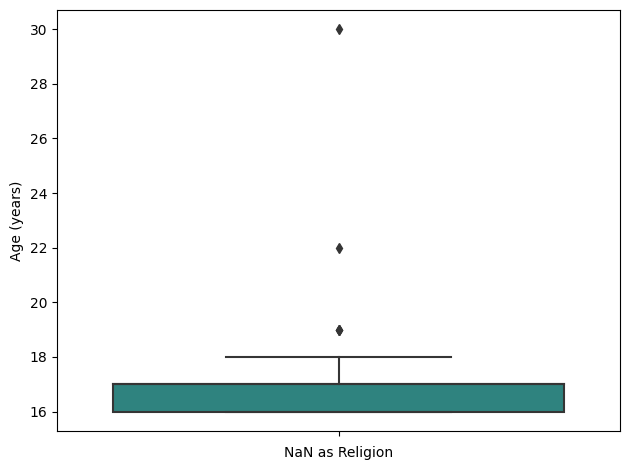

In [85]:
#Create a boxplot using sns to visualise NaN religion
sns.boxplot(y='Age (years)', data=null_religion, palette='viridis')

plt.xlabel('NaN as Religion')
plt.tight_layout()

plt.show()

Percentage of None (adults who entered that they don't have a religion) of the total population

In [86]:
#Filter individuals with NaN religion
none_religion = df[df['Religion'] == 'None']

#Number of None values in none_religion
count_of_none_religion = len(none_religion)
print(f"Count of None as religion: {count_of_none_religion}")

#Calculate the percentage of total population with None in Religion
percentage_none_religion = (count_of_none_religion / total_population) * 100
print(f"The percentage of the total population with None as Religion is: {percentage_none_religion:.1f}%")

Count of None as religion: 2842
The percentage of the total population with None as Religion is: 34.0%


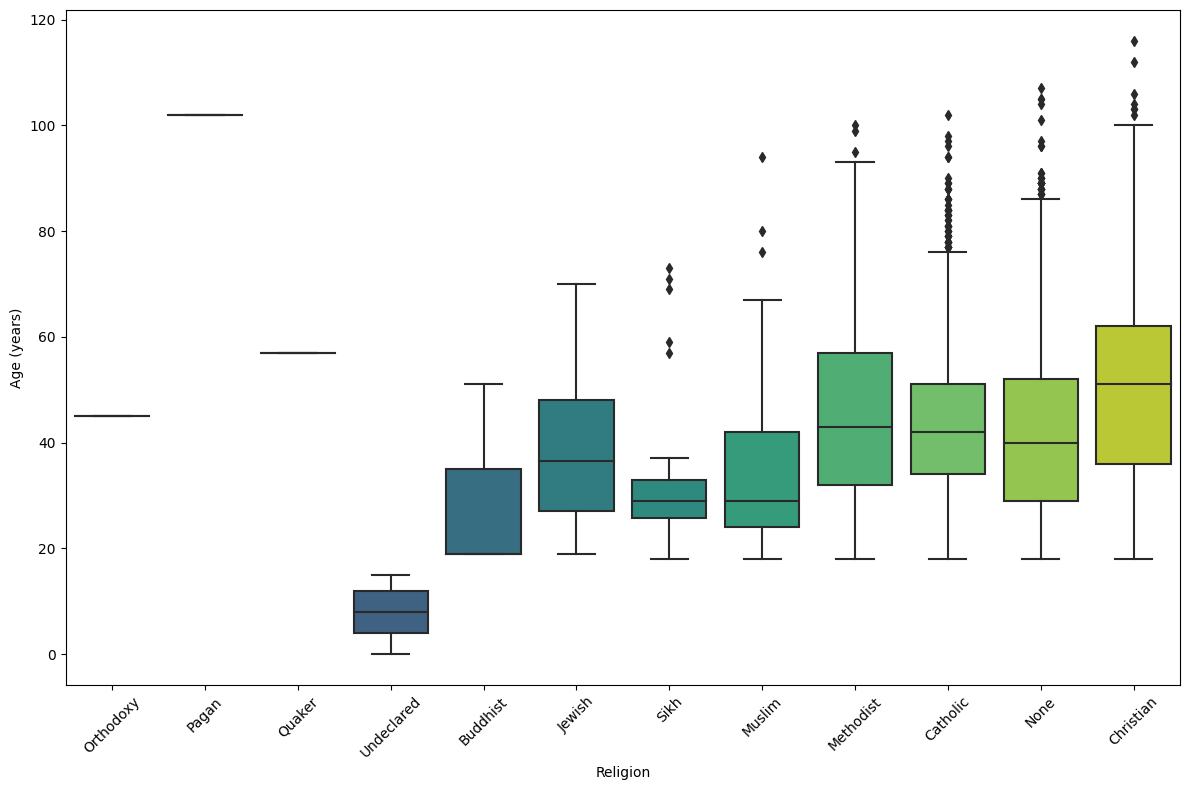

In [87]:
#Define function to calculate range of grouped df religion_age
def calculate_range(data):
    """
    Calculate the range for each group within a grouped DataFrame.

    Parameters:
    data (pd.DataFrame): Input DataFrame.

    Returns:
    pandas.Series, the range for each group.
    """
    return data.max() - data.min()

#Create a boxplot using sns to visualise age range by religion
def plot_age_range_religion(data):
    """
    Create a boxplot to visualize the distribution of age ranges across different religions.

    Parameters:
    - data (pd.DataFrame): Input DataFrame.

    Returns:
    - plt.Figure: The Matplotlib Figure object of the boxplot.
    """
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x='Religion', y='Age (years)', data=data, order=religion_age.agg(calculate_range).sort_values().index, palette='viridis', ax=ax)

    plt.xlabel('Religion')
    plt.ylabel('Age (years)')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return fig

age_range_by_religion = plot_age_range_religion(df)

Religions associated with older people are Christian, Catholic and Methodist. There are also older people with no religion 'None'. There is already a place of worship for Catholics in the town. There may be a requirement for a place of worship for Christian or Methodist religions based on population size of these religions. However, investment could only be justified if  high inheritance of religion within families/households, to determine that the population of these religions will remain high in the future. 
The percentage of the total population with None as Religion is 34%.

For younger generations under 40 there are "emerging" religions Buddhist, Sikh, Muslim and Jewish. This is represented by the lower median ages and comparatively narrower IQR for these religions compared to Christian, Catholic and Methodist.
The percentage of people with Muslim, Sikh, Jewish, or Buddhist religions is 2.1% of the total population. These religions may  be up and coming but represent a small percentage of the total population at the time of the census and therefore new places of worship for these religions is not justified.

For adults who did not answer religion in the census, the IQR is narrow with no-one over 30.
The percentage of the total population with NaN as Religion is: 3.1%. These younger adults make up a small percentage of the overall population.

*Inheritance of religion within families/households*

To estimate the percentage probability that a certain religion is passed from parent to child for each religion, calculate the ratio of the number of matches (where the 'Head' of the household has the same religion as someone under 16) to the total number of 'Head' individuals for each religion.

This isn't going to work for the dataset as no children (under 16) have any religious affiliations. They are all Undeclared. They were all NaN and one instance of 'None' before all under 16s were changed to Undeclared during data cleaning. 

In any case, here is the code to calculate percentage probability that a religion will be passed from parent to child (religion_inheritance_rate).

In [88]:
#Define function that calculates % probability of under 16s inheriting same religion as head of household
def religion_inheritance_rate(data):
    """
    Calculate the percentage probability of individuals under 16 having the same religion as the head of the household.

    Parameters:
    data (pd.DataFrame): Input DataFrame.

    Returns:
    percentage_probabilities: dict, percentage probabilities for each religion
    matching_households: set, households with matches
    """
    #Create households_with_under_16 df by filtering individuals under 16
    under_16_addresses = data[data['Age (years)'] < 16][['Street', 'House Number']]

    #Merge df with households_with_under_16 based on Street and House Number columns
    #Keeping only the rows that have matching values in both
    households_with_under_16 = pd.merge(df, under_16_addresses, on=['Street', 'House Number'], how='inner')

    #Filter individuals identified as Head
    heads_df = households_with_under_16[households_with_under_16['Relationship to Head of House'] == 'Head']

    #Create dictionaries and set to store results
    matches_by_religion = {}
    total_heads_by_religion = {}
    matching_households = set()
    
    #Iterate over head of households and check for matching religions among individuals under 16 in the same household
    for _, head_row in heads_df.iterrows():
        matching_religion = any(
            households_with_under_16[
                (households_with_under_16['Street'] == head_row['Street']) &
                (households_with_under_16['House Number'] == head_row['House Number']) &
                (households_with_under_16['Age (years)'] < 16)
            ]['Religion'] == head_row['Religion']
        )
        religion = head_row['Religion']
        #Keep track of the total number of heads and matches for each religion
        #Check if the current religion is not in the dictionary tracking total heads
        #If not, initialise the count for this religion to zero
        if religion not in total_heads_by_religion:
            total_heads_by_religion[religion] = 0
        #Increment the count of total heads for the current religion
        total_heads_by_religion[religion] += 1
        #Check if there is a matching religion among individuals under 16 in the same household
        if matching_religion:
            #Check if the current religion is not in the dictionary tracking matches
            if religion not in matches_by_religion:
                #If not, initialise the count to zero
                matches_by_religion[religion] = 0
            #Increment the count of matches for the current religion
            matches_by_religion[religion] += 1
            #Add the current household (Street, House Number) to the set of matching households
            matching_households.add((head_row['Street'], head_row['House Number']))

    #Calculate the percentage probability for each religion
    percentage_probabilities = {}
    for religion, matches in matches_by_religion.items():
        total_heads = total_heads_by_religion[religion]
        percentage_probabilities[religion] = (matches / total_heads) * 100 if total_heads > 0 else 0

    return percentage_probabilities, matching_households

percentage_probabilities, matching_households = religion_inheritance_rate(df)

#Print the results
print("Households with Matches:")
for street, house_number in matching_households:
    print(f"Street: {street}, House Number: {house_number}")

print("\nPercentage Probability of Religion Inheritance:")
for religion, probability in percentage_probabilities.items():
    print(f"Religion: {religion}, Percentage Probability: {probability:.1f}%")

Households with Matches:

Percentage Probability of Religion Inheritance:


*Predict religious affiliations of the population in 10 years*

Can use the birth and death rates.
Calculate how many people will die over the next 10 years, and how many will be born. Uses birth and death rates calculated previously (with asumptions already detailed).

In [89]:
#Define function to predict population in 10 yearsusing birth and death rate
def predict_population_growth(birth_rate, death_rate, total_population, years_to_predict=10):
    """
    Predict net population growth over the next specified number of years.

    Parameters:
    birth_rate (float): The birth rate per 1000 people.
    death_rate (float): The death rate per 1000 people.
    total_population (int): The total population.
    years_to_predict (int): The number of years to predict (default is 10).

    Returns:
    tuple: A tuple containing predicted births, predicted deaths, and net population growth.
    """
    #Convert rates to decimals
    dec_birth_rate = birth_rate / 1000
    dec_death_rate = death_rate / 1000

    #Predict births and deaths over the next specified number of years
    predicted_births = total_population * dec_birth_rate * years_to_predict
    predicted_deaths = total_population * dec_death_rate * years_to_predict

    #Calculate net population growth
    net_population_growth = predicted_births + predicted_deaths

    return dec_birth_rate, dec_death_rate, predicted_births, predicted_deaths, net_population_growth

dec_birth_rate, dec_death_rate, predicted_births, predicted_deaths, net_population_growth = predict_population_growth(birth_rate_15_44, crude_death_rate_65_and_over, total_population)

print(f"Predicted Births: {predicted_births:.0f}")
print(f"Predicted Deaths: {predicted_deaths:.0f}")
print(f"Net Population Growth: {net_population_growth:.0f}")

Predicted Births: 3690
Predicted Deaths: -776
Net Population Growth: 2914


This calculation predicts the number of births and deaths over the next 10 years and calculates the net population growth.

These predictions are based on the assumption that the birth and death rates remain constant over the next 10 years, which may not be the case in reality. Additionally, this model does not account for other demographic factors like migration or age distribution. 

*Distribution of religions of those who will die in the next 10 years*

Use predicted number of deaths and the distribution of religions. Removed Undeclared category for analysis (children under 16).

Predicted Deaths by Religion:
None         346.8
Christian    238.7
Catholic     107.9
Methodist     60.9
Muslim        11.8
Sikh           4.9
Jewish         4.4
Buddhist       0.4
Quaker         0.1
Pagan          0.1
Orthodoxy      0.1
Name: Religion, dtype: float64


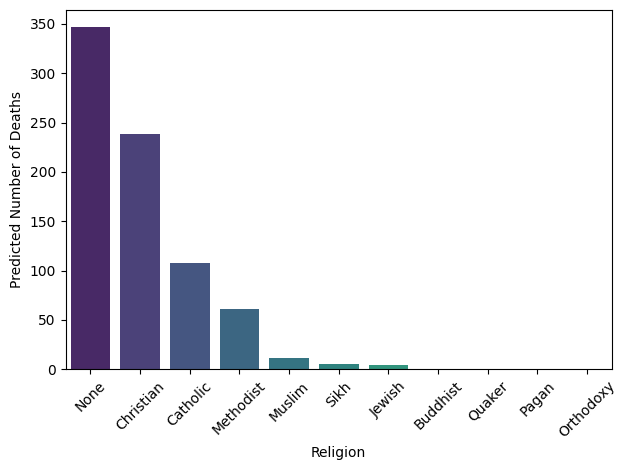

In [90]:
#Function to predict deaths by religion in 10 years
def plot_predicted_deaths_religion(data):
    """
    Plot predicted deaths by religion as a bar chart.

    Parameters:
    dataframe (pd.DataFrame): Input DataFrame.

    Returns:
    fig: matplotlib.figure.Figure, the generated figure
    """
    #Exclude 'Undeclared' (children aged under 16) from the data
    filtered_data = data[data['Religion'] != 'Undeclared']

    #Calculate the proportion of each religion in the filtered population
    religion_distribution = filtered_data[filtered_data['Religion'].notnull()]['Religion'].value_counts(normalize=True)

    #Predicted deaths in each religion based on the filtered distribution rounded to 1dp
    predicted_deaths_by_religion = (predicted_deaths * religion_distribution).round(1).abs()

    print("Predicted Deaths by Religion:")
    print(predicted_deaths_by_religion)

    #Plot the bar chart
    fig, ax = plt.subplots()
    sns.barplot(x=predicted_deaths_by_religion.index, y=predicted_deaths_by_religion.values, palette='viridis', ax=ax)
    plt.xlabel("Religion")
    plt.ylabel("Predicted Number of Deaths")
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

    return fig

predicted_deaths_vs_religion = plot_predicted_deaths_religion(df)

This calculates the proportion of each religion in the current population (excluding NaN values and Undeclared in the 'Religion' column) and then estimates the number of deaths in each religion based on this distribution. 

Assumes that the distribution of religions remains constant over the next 10 years. 

The most deaths will occur with No religion, with Christians second.

To determine the distribution of religions of those who will reach the age of 16 or older in the next 10 years use the religion inheritance rate calculated above. However, no children under 16 have inherited their parents religion (all Undeclared), the code is supplied below using an example inheritance rate of 80.

Predicted Population of those reaching aged 16 in next 10 years by Religion:
Undeclared    1122.88
Name: Religion, dtype: float64


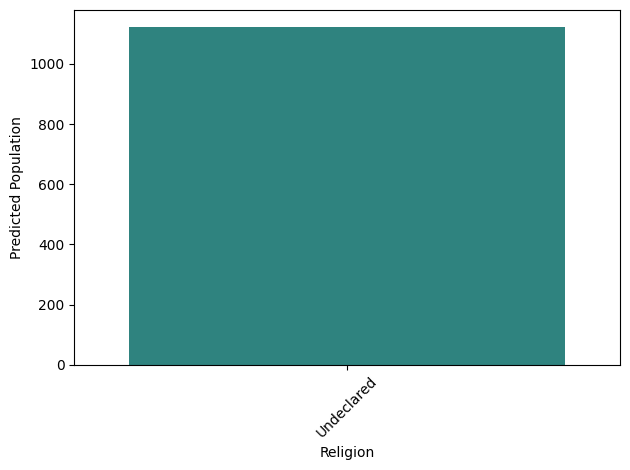

In [91]:
#Function to predict population reaching 16 and religion distribution
def plot_predicted_population_reaching_16(data, age_range=(5, 15), growth_rate=10, religion_inheritance_rate=80):
    """
    Plot predicted population reaching aged 16 or older in the next 10 years by religion.

    Parameters:
    data (pd.DataFrame): Input DataFrame.
    age_range: tuple, age range for selecting individuals
    growth_rate: float, assumed growth rate in percent
    religion_inheritance_rate: float, inheritance rate for religion in percent

    Returns:
    fig: matplotlib.figure.Figure, the generated figure
    """
    #Extract individuals in the specified age range
    selected_age_range = data[(data['Age (years)'] >= age_range[0]) & (data['Age (years)'] <= age_range[1])]

    #Calculate the predicted population reaching 16 or older in the next 10 years
    predicted_population = selected_age_range.shape[0] * (1 + (growth_rate / 100))

    #Calculate the proportion of each religion in the selected population
    religion_distribution = selected_age_range[selected_age_range['Religion'].notnull()]['Religion'].value_counts(normalize=True)

    #Predicted population reaching 16 or older by religion
    predicted_population_by_religion = predicted_population * religion_distribution * (religion_inheritance_rate / 100)

    print("Predicted Population of those reaching aged 16 in next 10 years by Religion:")
    print(predicted_population_by_religion)

    #Plot the results using sns
    fig, ax = plt.subplots()
    sns.barplot(x=predicted_population_by_religion.index, y=predicted_population_by_religion, palette='viridis', ax=ax)
    plt.xlabel("Religion")
    plt.ylabel("Predicted Population")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()
    
    return fig

predicted_population_reaching_16 = plot_predicted_population_reaching_16(df)

*Summary of Religion*

Religion inheritance cannot be predicted from the dataset and therfore cannot predict religion uptake by children over the next ten years. The most deaths by religion in the next ten years will be those with no religion, followed by Christians, Catholics and Methodist (the religions with older median age). 

Emerging religions for younger ages represent a small percentage of the total population (approx 2%) and a new house of worship cannot be justified. The need may change for future generations.

Based on this analysis, no recommendation can be made for a new place of worship in the town.

**Infirmity**

Analysis undertaken in this section:

1. Percentage of total population with an infirmity
2. Estimate percentage of the total population needing care
3. Fraction of over-80s in the population, and how might this change 10 years from now
4. Predict birth rate in the community 10 years from now

Calculate the number of people with medical conditions in the community. 

Determine if the community is healthy overall.

In [92]:
#Calculate the percentage of df with an infirmity in Infirmity series, exclude all 'None' instances
infirmity = df[(df['Infirmity'] != 'None')]

count_of_infirmity = len(infirmity)

percentage_with_infirmity = (count_of_infirmity / total_population) * 100

print(f"Percentage with infirmity: {percentage_with_infirmity:.1f}%")

Percentage with infirmity: 0.7%


Less than 1% of the population have an infirmity. Community is considered healthy.

Estimate how many older people might need care and combine this with the expected number of births. Assuming 2.5% of older population (65 and over) will need care.

Proportion of population (England and Wales) living in a care home aged 65 and over was 2.5% in 2021:

Office for National Statistics (2023) Older people living in care homes in 2021 and changes since 2011. Available online: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/ageing/articles/olderpeoplelivingincarehomesin2021andchangessince2011/2023-10-09 [Accessed 08/12/2023]

In [93]:
#Number of people aged over 65
current_older_population = len(df[df['Age (years)'] >= 65])

#Assuming 2.5% of the older population might need care
percentage_needing_care = 0.025
estimated_older_population_needing_care = current_older_population * percentage_needing_care

#Using birth rate and total_population
expected_number_of_births = total_population * dec_birth_rate

#Combine estimates (lots of assumptions!)
total_population_needing_care = estimated_older_population_needing_care + expected_number_of_births

#Calculate the percentage of the total population needing care
percentage_of_population_needing_care = (total_population_needing_care / total_population) * 100

print(f"Estimated older population needing care: {estimated_older_population_needing_care:.1f}")
print(f"Expected number of births: {expected_number_of_births:.1f}")
print(f"Combined estimate of population needing care: {total_population_needing_care:.1f}")
print(f"Percentage of the total population needing care: {percentage_of_population_needing_care:.1f}%")

Estimated older population needing care: 23.6
Expected number of births: 369.0
Combined estimate of population needing care: 392.6
Percentage of the total population needing care: 4.7%


The calculation assumes that 2.5% of the population aged over 65 might need care. This is a generalisation and may not accurately represent the actual percentage of the older population requiring care. The actual percentage can vary based on health conditions, socioeconomic factors, and other variables. The expected number of births is calculated using a birth rate  making a number of assumptions already discussed, and is assumed to apply uniformly to the entire population and does not account for variations in fertility rates across different age groups or demographic factors.

The calculation combines the estimates of the older population needing care and the expected number of births. This assumes that these two groups are the primary contributors to the population needing care, and there are no other significant factors influencing the need for care.

The calculation uses the current population for calculations. It assumes a static population size and does not account for changes in population due to migration, mortality, or other demographic factors.

This calculation also does not consider complex demographic models or projections. It assumes a linear projection of the expected number of births without accounting for variations in birth rates over time.

*Fraction of over-80s in the population, and how might this to change 10 years from now*

Use the current number of 70-year-olds, the death rate, and a simple growth model to estimate the fraction of 80-year-olds in the future and determine if the number will be greater than the current fraction of individuals over 80.

In [94]:
#Calculate the current number and fraction of over 80 year olds
current_number_over_80 = (df['Age (years)'] > 80).sum()
current_fraction_over_80 = current_number_over_80 / total_population

print(f"Current fraction of individuals over 80: {current_fraction_over_80:.2%}")
print(f"Current number of individuals over 80: {current_number_over_80:.0f}")

#Use dec_death_rate death rate
#Assumes a death rate for individuals over 65 and estimates the number of 70 year olds in 10 years
#Then estimates the number of individuals over 80 in 10 years by adding the estimated number of 70 year olds to the current number of individuals over 80
#Estimate the number of 70 year olds in 10 years
estimated_number_70_in_10_years = df[df['Age (years)'] == 70].shape[0] * (1 - dec_death_rate) ** 10

#Estimate the number of 80 year olds in 10 years, considering mortality (using dec_death_rate again)
estimated_number_over_80_in_10_years = current_number_over_80 * (1 - dec_death_rate) ** 10 + estimated_number_70_in_10_years

#Estimate the fraction of individuals over 80 in 10 years
estimated_fraction_over_80_in_10_years = estimated_number_over_80_in_10_years / total_population

print(f"Estimated fraction of individuals over 80 in 10 years: {estimated_fraction_over_80_in_10_years:.2%}")
print(f"Estimated number of individuals over 80 in 10 years: {estimated_number_over_80_in_10_years:.0f}")

#Calculate the percentage increase
percentage_increase_over_80_in_10_years = ((estimated_number_over_80_in_10_years - current_number_over_80) / current_number_over_80) * 100

print(f"Percentage increase in over 80s in 10 years: {percentage_increase_over_80_in_10_years:.2f}%")

#Compare with the current fraction of over 80 year olds
if estimated_fraction_over_80_in_10_years > current_fraction_over_80:
    print("The estimated number of individuals over 80 in 10 years is greater than the current fraction.")
else:
    print("The estimated number of individuals over 80 in 10 years is not greater than the current fraction.")

Current fraction of individuals over 80: 2.63%
Current number of individuals over 80: 220
Estimated fraction of individuals over 80 in 10 years: 3.54%
Estimated number of individuals over 80 in 10 years: 296
Percentage increase in over 80s in 10 years: 34.59%
The estimated number of individuals over 80 in 10 years is greater than the current fraction.


The calculation predicts the future population of individuals over 80, using calculated death rate for over 65s. It then compares the estimated future fraction with the current fraction and prints the expected change in the population over 80 in 10 years.

Based on the assumptions that death rate is unchanged for all age groups and will not change over time, the number of 80 year olds is predicted to be greater in 10 years time. This also assumes that death rate declines linearly with age. It also does not account for other factors that could influence the age distribution.

*Predict number of births in the community in ten years*

It is impossible to predict based on the data what the birth rate will be in 10 years time. Lack of historical data means that meaningful predictions cannot be made.

The birth rate calculations are based on number of 0 year old children as a proportion or total of population. Any calculation assumes a constant crude birth rate over the next 10 years- very simplistic!

88 newborns are born in the census year. Multiplying by 10 (for ten years) gives 880 estimated births over ten years.

In [95]:
#Calculate the estimated number of births over 10 years using crude birth rate
estimated_births_in_10_years = (crude_birth_rate / 1000) * total_population * 10
print(f"Estimated number of births over 10 years based on crude birth rate: {estimated_births_in_10_years:.0f}")

Estimated number of births over 10 years based on crude birth rate: 880


Several assumptions are being made in this analysis:

The analysis assumes that the birth rates  will remain constant over the next 10 years. In reality, birth rates can change due to various factors, such as economic conditions, social trends and unexpected events (like pandemics!). The analysis also assumes that the overall population size remains relatively stable over the next 10 years. This means that factors like immigration, emigration, and significant changes in mortality rates are not considered. The calculation is also based on a linear projection, assuming a constant rate of change. This may not accurately reflect real-world scenarios where birth rates can fluctuate.

*Summary of infirmity and health*

Less than 1% of the population have an infirmity. Community is considered healthy.

**Summary of findings**

A growing population (birth rate is greater than death rate, positive net migration, increasingly ageing population) coupled with over-occupancy, indicates that more housing may be required.

There is a positive net migration contributing to the population of the town. Family households are accommodating the majority of immigrants (lodgers and visitors). Family households with unmarried parents represent 25% of families with immigrants staying with them. These families may be doing so to avoid downsizing. Unable to determine if immigrants are making a permanent move to the town.

High-density housing may be indicated to accommodate immigrants, families wishing to downsize, divorced people with or without children, and older people in an increasingly aging population. 

Due to the high number of commuters, a train station is also indicated. This could further add to housing pressures/over-occupancy by attracting more immigrants due to improved transport links.

In the future, a train station may be worth investing in, but housing will potentially benefit more of the population as opposed to the employed population alone.

The unemployment rate is slightly higher than the national statistics. A greater number of people in middle-age are unemployed. By gender, male unemployment equals the national unemployment rate. More females are unemployed, potentially due to caregiving responsiblities. There is no significant difference between salary for males and females. The large number of commuters suggests that the larger cities provide employment opportunity. A train station may increase the employment rate by improving accessibility to employment opportunities. Investment in employment and training isn't indicated.

There is a lower number of 0-4 year olds in the population compared to school-age children, and no predicted increase in future birth rate, indicating that investment in school spending is not required, assuming existing provision is adequate.

Birth rate is lower than the national statistic. However, birth rate exceeds the death rate with population growth indicated. Future birth rate trends cannot be reliably predicted from the data. Evolving birth rate indicates a potential decline in birth rate. Assuming that the current maternity facilities in the town are adequate, need for additional maternity services are not indicated.

There is evidence for increasing numbers of retired and people over aged 80 in the future, and an increasingly aging population is indicated. Coupled with the relatively good affluency of the town, life expectancy may increase. Less than 1% of the population have an infirmity and the population is considered healthy, but this may change with increasing life expectancy. As a result, the town may need to allocate more funding for end of life care.

Emerging religions for younger ages represent a small percentage of the total population (approx 2%) and a new house of worship cannot be justified. The need may change for future generations. Could not determine religion inheritance from the data, therefore can not draw any conclusion about the future requirement of a house of worship for emerging or more popular religions with older median ages.

Increased housing will require investment in council services to develop and maintain infrastructure. Although a train station could be a good addition to the town in the future, in the meantime, road maintenance is important for the significant number of commuters in the town that may only increase if more immigrants are attracted to the area due to town expansion.

In [96]:
#Create dict of all the plots created in this notebook for use in report
figures_to_save = {}

figures_to_save["./age_count.png"] = age_count
figures_to_save["./male_age_count.png"] = male_age
figures_to_save["./female_age_count.png"] = female_age
#figures_to_save["./pyramid_age_group.png"] = pyramid_age_group
figures_to_save["./pyramid_male_female.png"] = pyramid_male_female
figures_to_save["./salary_distribution.png"] = salary_distribution
figures_to_save["./salary_category_vs_age.png"] = salary_category_vs_age
figures_to_save["./occupation_category_distribution.png"] = occupation_category_distribution
figures_to_save["./age_vs_unemployed_gender.png"] = age_vs_unemployed_gender
figures_to_save["./marital_status_distribution.png"] = marital_status_distribution
figures_to_save["./age_vs_marital_status.png"] = age_vs_marital_status
figures_to_save["./divorced_vs_gender.png"] = divorced_vs_gender
figures_to_save["./occupancy_distribution.png"] = occupancy_distribution
figures_to_save["./marital_status_age_occupancy.png"] = marital_status_age_occupancy 
figures_to_save["./occupancy_category_distribution_median_town.png"] = occupancy_category_distribution_median_town
figures_to_save["./religion_distribution.png"] = religion_distribution
figures_to_save["./age_range_by_religion.png"] = age_range_by_religion
figures_to_save["./predicted_deaths_vs_religion.png"] = predicted_deaths_vs_religion

figures_to_save

{'./age_count.png': <Figure size 640x480 with 1 Axes>,
 './male_age_count.png': <Figure size 640x480 with 1 Axes>,
 './female_age_count.png': <Figure size 640x480 with 1 Axes>,
 './pyramid_male_female.png': <Figure size 800x600 with 1 Axes>,
 './salary_distribution.png': <Figure size 640x480 with 1 Axes>,
 './salary_category_vs_age.png': <Figure size 800x800 with 1 Axes>,
 './occupation_category_distribution.png': <Figure size 640x480 with 1 Axes>,
 './age_vs_unemployed_gender.png': <Figure size 640x480 with 1 Axes>,
 './marital_status_distribution.png': <Figure size 640x480 with 1 Axes>,
 './age_vs_marital_status.png': <Figure size 800x800 with 1 Axes>,
 './divorced_vs_gender.png': <Figure size 640x480 with 1 Axes>,
 './occupancy_distribution.png': <Figure size 640x480 with 1 Axes>,
 './marital_status_age_occupancy.png': <Figure size 1000x1000 with 4 Axes>,
 './occupancy_category_distribution_median_town.png': <Figure size 640x480 with 1 Axes>,
 './religion_distribution.png': <Figure 

In [97]:
#Function to save figures in any dictionary
def save_figures(fig_dict):
    """
    Save figures from the provided dictionary.

    Parameters:
    fig_dict (dict): Dictionary where keys are filenames and values are figure objects.

    Returns:
    None
    """
    for filename, figure in fig_dict.items():
        figure.savefig(filename)

save_figures(figures_to_save)